# Rescaling
## Rescaling base quality scores using aDNA damage profile

The idea of rescaling read base quality scores using damage profile was first introduced by mapDamage2. 
Rescaling base quality score is one of the way to deal with aDNA damage, which otherwise can introduces biases, in variant calling for example.  

However, the runtime necessary to rescale these reads with mapDamage2 made it more than often prohibitive to use this functionality.  
Starting from version 0.80, PyDamage now also offers a base quality score rescaling.

This notebook is used to demontrate the performance of PyDamage v0.80 vs the current version of mapDamage2 (v2.2.2 as of 2024/09/18), and compare their rescaling results.

For both PyDamage and mapDamage, the output of the rescaling will be a `BAM` file with rescaled read base quality score.

In [1]:
import pandas as pd
import pysam
from plotnine import *
import numpy as np

In [2]:
! pydamage --version

pydamage, version 0.80


In [3]:
%%timeit -r 3 -o
! pydamage analyze --rescale --group --force ../../tests/data/bigger_test_data.bam

Estimating and testing Damage
Computing alignment stats for entire reference



Compute damage for entire reference: 0it [00:00, ?it/s]


Compute damage for entire reference: 11422it [00:00, 114152.07it/s]


Compute damage for entire reference: 23080it [00:00, 115564.42it/s]


Compute damage for entire reference: 34637it [00:00, 112379.51it/s]


Compute damage for entire reference: 46904it [00:00, 116370.15it/s]


Compute damage for entire reference: 58984it [00:00, 117947.02it/s]


Compute damage for entire reference: 70789it [00:00, 117511.17it/s]


Compute damage for entire reference: 82547it [00:00, 114832.58it/s]


Compute damage for entire reference: 94823it [00:00, 117300.05it/s]


Compute damage for entire reference: 107288it [00:00, 119561.15it/s]


Compute damage for entire reference: 119258it [00:01, 119035.95it/s]


Compute damage for entire reference: 131172it [00:01, 115322.56it/s]


Compute damage for entire reference: 142733it [00:01, 114135.87it/s]


Compute damage for entire reference: 154166it [00:01, 113346.69it/s]


Compute damage for entire reference: 165514it [00:01, 111400.21it/s]


Compute damage for entire reference: 178148it [00:01, 115767.59it/s]


Compute damage for entire reference: 190725it [00:01, 118713.69it/s]


Compute damage for entire reference: 203456it [00:01, 121257.10it/s]


Compute damage for entire reference: 215601it [00:01, 119441.86it/s]


Compute damage for entire reference: 227594it [00:01, 119584.84it/s]


Compute damage for entire reference: 240166it [00:02, 121399.90it/s]


Compute damage for entire reference: 252866it [00:02, 123062.60it/s]


Compute damage for entire reference: 265543it [00:02, 124165.52it/s]


Compute damage for entire reference: 278130it [00:02, 124672.37it/s]


Compute damage for entire reference: 290603it [00:02, 118672.24it/s]


Compute damage for entire reference: 302534it [00:02, 116520.31it/s]


Compute damage for entire reference: 315059it [00:02, 119032.93it/s]


Compute damage for entire reference: 327739it [00:02, 121294.18it/s]


Compute damage for entire reference: 340463it [00:02, 123039.47it/s]


Compute damage for entire reference: 353257it [00:02, 124486.17it/s]


Compute damage for entire reference: 366042it [00:03, 125482.73it/s]


Compute damage for entire reference: 378923it [00:03, 126472.37it/s]


Compute damage for entire reference: 391583it [00:03, 126079.39it/s]


Compute damage for entire reference: 404334it [00:03, 126503.70it/s]


Compute damage for entire reference: 417081it [00:03, 126788.20it/s]


Compute damage for entire reference: 429869it [00:03, 127112.66it/s]


Compute damage for entire reference: 442584it [00:03, 126924.38it/s]


Compute damage for entire reference: 455279it [00:03, 126442.32it/s]


Compute damage for entire reference: 467989it [00:03, 126636.35it/s]


Compute damage for entire reference: 480655it [00:03, 125484.27it/s]


Compute damage for entire reference: 493390it [00:04, 126037.86it/s]


Compute damage for entire reference: 506049it [00:04, 126199.66it/s]


Compute damage for entire reference: 518756it [00:04, 126457.98it/s]


Compute damage for entire reference: 531490it [00:04, 126717.94it/s]


Compute damage for entire reference: 544163it [00:04, 126633.10it/s]


Compute damage for entire reference: 556828it [00:04, 126490.11it/s]


Compute damage for entire reference: 569478it [00:04, 126315.70it/s]


Compute damage for entire reference: 582142it [00:04, 126409.44it/s]


Compute damage for entire reference: 594784it [00:04, 126220.51it/s]


Compute damage for entire reference: 607407it [00:04, 125972.04it/s]


Compute damage for entire reference: 620023it [00:05, 126022.45it/s]


Compute damage for entire reference: 632726it [00:05, 126321.58it/s]


Compute damage for entire reference: 645499it [00:05, 126740.61it/s]


Compute damage for entire reference: 658174it [00:05, 126703.90it/s]


Compute damage for entire reference: 670845it [00:05, 126398.32it/s]


Compute damage for entire reference: 683486it [00:05, 125324.18it/s]


Compute damage for entire reference: 696021it [00:05, 124843.38it/s]


Compute damage for entire reference: 708507it [00:05, 124528.19it/s]


Compute damage for entire reference: 720961it [00:05, 123695.49it/s]


Compute damage for entire reference: 733355it [00:05, 123766.40it/s]


Compute damage for entire reference: 746024it [00:06, 124633.49it/s]


Compute damage for entire reference: 758716it [00:06, 125313.43it/s]


Compute damage for entire reference: 771330it [00:06, 125558.97it/s]


Compute damage for entire reference: 784093it [00:06, 126175.20it/s]


Compute damage for entire reference: 796712it [00:06, 125299.85it/s]


Compute damage for entire reference: 809244it [00:06, 124661.71it/s]


Compute damage for entire reference: 821858it [00:06, 125098.63it/s]


Compute damage for entire reference: 834406it [00:06, 125209.86it/s]


Compute damage for entire reference: 846929it [00:06, 125078.14it/s]


Compute damage for entire reference: 859498it [00:06, 125259.49it/s]


Compute damage for entire reference: 872029it [00:07, 125271.78it/s]


Compute damage for entire reference: 884680it [00:07, 125640.30it/s]


Compute damage for entire reference: 897296it [00:07, 125794.44it/s]


Compute damage for entire reference: 909876it [00:07, 125460.91it/s]


Compute damage for entire reference: 922423it [00:07, 125282.48it/s]


Compute damage for entire reference: 934952it [00:07, 123208.34it/s]


Compute damage for entire reference: 947281it [00:07, 121741.66it/s]


Compute damage for entire reference: 959571it [00:07, 122081.75it/s]


Compute damage for entire reference: 972035it [00:07, 122837.63it/s]


Compute damage for entire reference: 984724it [00:08, 124040.69it/s]


Compute damage for entire reference: 997226it [00:08, 124330.20it/s]


Compute damage for entire reference: 1009817it [00:08, 124800.58it/s]


Compute damage for entire reference: 1022419it [00:08, 125162.54it/s]


Compute damage for entire reference: 1035105it [00:08, 125669.54it/s]


Compute damage for entire reference: 1047834it [00:08, 126153.79it/s]


Compute damage for entire reference: 1060530it [00:08, 126390.91it/s]


Compute damage for entire reference: 1073170it [00:08, 126330.20it/s]


Compute damage for entire reference: 1085804it [00:08, 126118.94it/s]


Compute damage for entire reference: 1098456it [00:08, 126234.75it/s]


Compute damage for entire reference: 1111080it [00:09, 126183.54it/s]


Compute damage for entire reference: 1123841it [00:09, 126608.11it/s]


Compute damage for entire reference: 1136503it [00:09, 126400.51it/s]


Compute damage for entire reference: 1149144it [00:09, 125867.24it/s]


Compute damage for entire reference: 1161732it [00:09, 123785.52it/s]


Compute damage for entire reference: 1174118it [00:09, 123564.24it/s]


Compute damage for entire reference: 1186480it [00:09, 120100.34it/s]


Compute damage for entire reference: 1198512it [00:09, 117798.07it/s]


Compute damage for entire reference: 1210964it [00:09, 119746.18it/s]


Compute damage for entire reference: 1222959it [00:09, 115656.48it/s]


Compute damage for entire reference: 1234562it [00:10, 114573.50it/s]


Compute damage for entire reference: 1246044it [00:10, 114633.27it/s]


Compute damage for entire reference: 1257525it [00:10, 113551.79it/s]


Compute damage for entire reference: 1269208it [00:10, 114507.57it/s]


Compute damage for entire reference: 1280735it [00:10, 114729.56it/s]


Compute damage for entire reference: 1293496it [00:10, 118544.36it/s]


Compute damage for entire reference: 1306889it [00:10, 123119.03it/s]


Compute damage for entire reference: 1320394it [00:10, 126675.07it/s]


Compute damage for entire reference: 1333072it [00:10, 126404.25it/s]


Compute damage for entire reference: 1346560it [00:10, 128931.61it/s]


Compute damage for entire reference: 1360049it [00:11, 130711.21it/s]


Compute damage for entire reference: 1373608it [00:11, 132170.26it/s]


Compute damage for entire reference: 1387333it [00:11, 133689.24it/s]


Compute damage for entire reference: 1401102it [00:11, 134885.71it/s]


Compute damage for entire reference: 1414769it [00:11, 135416.63it/s]


Compute damage for entire reference: 1428550it [00:11, 136132.79it/s]


Compute damage for entire reference: 1442439it [00:11, 136957.49it/s]


Compute damage for entire reference: 1456204it [00:11, 137161.49it/s]


Compute damage for entire reference: 1470254it [00:11, 138160.57it/s]


Compute damage for entire reference: 1484071it [00:11, 135357.83it/s]


Compute damage for entire reference: 1497691it [00:12, 135604.97it/s]


Compute damage for entire reference: 1511261it [00:12, 135555.77it/s]


Compute damage for entire reference: 1525127it [00:12, 136479.40it/s]


Compute damage for entire reference: 1538803it [00:12, 136560.55it/s]


Compute damage for entire reference: 1552663it [00:12, 137168.68it/s]


Compute damage for entire reference: 1566629it [00:12, 137912.69it/s]


Compute damage for entire reference: 1580588it [00:12, 138412.53it/s]


Compute damage for entire reference: 1594551it [00:12, 138776.84it/s]


Compute damage for entire reference: 1608492it [00:12, 138963.38it/s]


Compute damage for entire reference: 1622463it [00:12, 139185.37it/s]


Compute damage for entire reference: 1636399it [00:13, 139230.90it/s]


Compute damage for entire reference: 1650386it [00:13, 139420.61it/s]


Compute damage for entire reference: 1664329it [00:13, 139411.20it/s]


Compute damage for entire reference: 1678271it [00:13, 139125.87it/s]


Compute damage for entire reference: 1692184it [00:13, 138636.11it/s]


Compute damage for entire reference: 1706190it [00:13, 139059.69it/s]


Compute damage for entire reference: 1720117it [00:13, 139121.87it/s]


Compute damage for entire reference: 1734030it [00:13, 137587.07it/s]


Compute damage for entire reference: 1747793it [00:13, 137484.00it/s]


Compute damage for entire reference: 1761545it [00:13, 136278.46it/s]


Compute damage for entire reference: 1775177it [00:14, 132925.70it/s]


Compute damage for entire reference: 1788488it [00:14, 130877.86it/s]


Compute damage for entire reference: 1801591it [00:14, 129261.42it/s]


Compute damage for entire reference: 1814528it [00:14, 128303.87it/s]


Compute damage for entire reference: 1827365it [00:14, 127737.67it/s]


Compute damage for entire reference: 1840143it [00:14, 127284.26it/s]


Compute damage for entire reference: 1852874it [00:14, 127084.53it/s]


Compute damage for entire reference: 1865584it [00:14, 123388.77it/s]


Compute damage for entire reference: 1878286it [00:14, 124442.61it/s]


Compute damage for entire reference: 1891118it [00:14, 125579.92it/s]


Compute damage for entire reference: 1903710it [00:15, 125676.21it/s]


Compute damage for entire reference: 1916318it [00:15, 125795.04it/s]


Compute damage for entire reference: 1928930it [00:15, 125889.34it/s]


Compute damage for entire reference: 1941644it [00:15, 126259.21it/s]


Compute damage for entire reference: 1954416it [00:15, 126694.34it/s]


Compute damage for entire reference: 1967089it [00:15, 126490.82it/s]


Compute damage for entire reference: 1979741it [00:15, 125664.92it/s]


Compute damage for entire reference: 1992359it [00:15, 125814.95it/s]


Compute damage for entire reference: 2005146it [00:15, 126426.70it/s]


Compute damage for entire reference: 2017791it [00:16, 126121.72it/s]


Compute damage for entire reference: 2030405it [00:16, 121883.67it/s]


Compute damage for entire reference: 2042624it [00:16, 119517.65it/s]


Compute damage for entire reference: 2054602it [00:16, 115539.25it/s]


Compute damage for entire reference: 2066193it [00:16, 114352.70it/s]


Compute damage for entire reference: 2078227it [00:16, 116072.67it/s]


Compute damage for entire reference: 2089858it [00:16, 115894.42it/s]


Compute damage for entire reference: 2101466it [00:16, 115947.68it/s]


Compute damage for entire reference: 2113865it [00:16, 118320.87it/s]


Compute damage for entire reference: 2126200it [00:16, 119811.66it/s]


Compute damage for entire reference: 2138814it [00:17, 121692.61it/s]


Compute damage for entire reference: 2151481it [00:17, 123173.86it/s]


Compute damage for entire reference: 2164180it [00:17, 124311.28it/s]


Compute damage for entire reference: 2176617it [00:17, 124292.80it/s]


Compute damage for entire reference: 2189342it [00:17, 125176.45it/s]


Compute damage for entire reference: 2201863it [00:17, 124486.11it/s]


Compute damage for entire reference: 2214315it [00:17, 124445.43it/s]


Compute damage for entire reference: 2227149it [00:17, 125607.12it/s]


Compute damage for entire reference: 2239969it [00:17, 126381.52it/s]


Compute damage for entire reference: 2252609it [00:17, 125839.16it/s]


Compute damage for entire reference: 2265195it [00:18, 125411.81it/s]


Compute damage for entire reference: 2277859it [00:18, 125777.49it/s]


Compute damage for entire reference: 2290580it [00:18, 126203.83it/s]


Compute damage for entire reference: 2303213it [00:18, 126238.38it/s]


Compute damage for entire reference: 2315838it [00:18, 126213.69it/s]


Compute damage for entire reference: 2328512it [00:18, 126366.42it/s]


Compute damage for entire reference: 2341149it [00:18, 125943.88it/s]


Compute damage for entire reference: 2353744it [00:18, 125923.75it/s]


Compute damage for entire reference: 2366512it [00:18, 126445.84it/s]


Compute damage for entire reference: 2379348it [00:18, 127015.20it/s]


Compute damage for entire reference: 2392136it [00:19, 127272.74it/s]


Compute damage for entire reference: 2404870it [00:19, 127288.66it/s]


Compute damage for entire reference: 2417601it [00:19, 127291.09it/s]


Compute damage for entire reference: 2430369it [00:19, 127405.93it/s]


Compute damage for entire reference: 2443110it [00:19, 127167.50it/s]


Compute damage for entire reference: 2455827it [00:19, 127014.90it/s]


Compute damage for entire reference: 2468529it [00:19, 126982.29it/s]


Compute damage for entire reference: 2481370it [00:19, 127408.98it/s]


Compute damage for entire reference: 2494248it [00:19, 127815.68it/s]


Compute damage for entire reference: 2507030it [00:19, 127412.69it/s]


Compute damage for entire reference: 2519772it [00:20, 127097.08it/s]


Compute damage for entire reference: 2532483it [00:20, 126408.97it/s]


Compute damage for entire reference: 2545260it [00:20, 126811.64it/s]


Compute damage for entire reference: 2557947it [00:20, 126827.12it/s]


Compute damage for entire reference: 2570631it [00:20, 126754.82it/s]


Compute damage for entire reference: 2583339it [00:20, 126850.89it/s]


Compute damage for entire reference: 2596025it [00:20, 126587.14it/s]


Compute damage for entire reference: 2608762it [00:20, 126816.95it/s]


Compute damage for entire reference: 2621593it [00:20, 127260.39it/s]


Compute damage for entire reference: 2634402it [00:20, 127505.96it/s]


Compute damage for entire reference: 2647205it [00:21, 127660.40it/s]


Compute damage for entire reference: 2659972it [00:21, 127524.04it/s]


Compute damage for entire reference: 2672725it [00:21, 127480.51it/s]


Compute damage for entire reference: 2685498it [00:21, 127553.40it/s]


Compute damage for entire reference: 2698291it [00:21, 127662.86it/s]


Compute damage for entire reference: 2711058it [00:21, 127277.72it/s]


Compute damage for entire reference: 2723787it [00:21, 127071.56it/s]


Compute damage for entire reference: 2736495it [00:21, 126321.35it/s]


Compute damage for entire reference: 2749129it [00:21, 126114.04it/s]


Compute damage for entire reference: 2761762it [00:21, 126174.20it/s]


Compute damage for entire reference: 2774380it [00:22, 125968.29it/s]


Compute damage for entire reference: 2786978it [00:22, 125865.74it/s]


Compute damage for entire reference: 2799565it [00:22, 125829.01it/s]


Compute damage for entire reference: 2812149it [00:22, 125725.60it/s]


Compute damage for entire reference: 2824722it [00:22, 125517.64it/s]


Compute damage for entire reference: 2837328it [00:22, 125675.98it/s]


Compute damage for entire reference: 2849896it [00:22, 125367.22it/s]


Compute damage for entire reference: 2862433it [00:22, 125266.80it/s]


Compute damage for entire reference: 2874960it [00:22, 125027.90it/s]


Compute damage for entire reference: 2887525it [00:22, 125210.38it/s]


Compute damage for entire reference: 2900312it [00:23, 126004.39it/s]


Compute damage for entire reference: 2912913it [00:23, 125873.71it/s]


Compute damage for entire reference: 2925501it [00:23, 124646.72it/s]


Compute damage for entire reference: 2938029it [00:23, 124831.64it/s]


Compute damage for entire reference: 2950622it [00:23, 125156.09it/s]


Compute damage for entire reference: 2963140it [00:23, 124270.40it/s]


Compute damage for entire reference: 2975570it [00:23, 122706.25it/s]


Compute damage for entire reference: 2987846it [00:23, 121852.06it/s]


Compute damage for entire reference: 3000035it [00:23, 121230.19it/s]


Compute damage for entire reference: 3012161it [00:23, 120493.26it/s]


Compute damage for entire reference: 3024212it [00:24, 118144.34it/s]


Compute damage for entire reference: 3036035it [00:24, 117696.71it/s]


Compute damage for entire reference: 3047850it [00:24, 117826.94it/s]


Compute damage for entire reference: 3059664it [00:24, 117915.94it/s]


Compute damage for entire reference: 3071459it [00:24, 117629.39it/s]


Compute damage for entire reference: 3083261it [00:24, 117741.35it/s]


Compute damage for entire reference: 3095155it [00:24, 118096.54it/s]


Compute damage for entire reference: 3106966it [00:24, 116752.75it/s]


Compute damage for entire reference: 3118725it [00:24, 116999.80it/s]


Compute damage for entire reference: 3130489it [00:24, 117187.33it/s]


Compute damage for entire reference: 3142374it [00:25, 117681.03it/s]


Compute damage for entire reference: 3154144it [00:25, 117493.76it/s]


Compute damage for entire reference: 3165982it [00:25, 117755.71it/s]


Compute damage for entire reference: 3177759it [00:25, 117397.92it/s]


Compute damage for entire reference: 3189549it [00:25, 117546.54it/s]


Compute damage for entire reference: 3194672it [00:25, 125123.77it/s]



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:00<02:29,  1.53it/s]


Rescaling quality scores:   1%|▏                | 3/230 [00:00<00:59,  3.81it/s]


Rescaling quality scores:   3%|▍                | 6/230 [00:01<00:27,  8.19it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:01<00:11, 19.32it/s]


Rescaling quality scores:   8%|█▎              | 19/230 [00:02<00:20, 10.16it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:02<00:13, 14.61it/s]


Rescaling quality scores:  15%|██▍             | 35/230 [00:03<00:18, 10.65it/s]


Rescaling quality scores:  17%|██▋             | 38/230 [00:04<00:22,  8.49it/s]


Rescaling quality scores:  17%|██▊             | 40/230 [00:05<00:37,  5.13it/s]


Rescaling quality scores:  18%|██▊             | 41/230 [00:06<00:57,  3.31it/s]


Rescaling quality scores:  19%|███             | 44/230 [00:06<00:41,  4.45it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:06<00:36,  5.05it/s]


Rescaling quality scores:  21%|███▍            | 49/230 [00:07<00:29,  6.14it/s]


Rescaling quality scores:  23%|███▌            | 52/230 [00:07<00:28,  6.18it/s]


Rescaling quality scores:  23%|███▊            | 54/230 [00:07<00:26,  6.62it/s]


Rescaling quality scores:  25%|████            | 58/230 [00:07<00:17,  9.60it/s]


Rescaling quality scores:  29%|████▌           | 66/230 [00:08<00:09, 16.60it/s]


Rescaling quality scores:  30%|████▊           | 70/230 [00:08<00:08, 19.35it/s]


Rescaling quality scores:  32%|█████           | 73/230 [00:08<00:10, 15.27it/s]


Rescaling quality scores:  33%|█████▎          | 76/230 [00:09<00:12, 11.91it/s]


Rescaling quality scores:  35%|█████▌          | 80/230 [00:09<00:10, 14.52it/s]


Rescaling quality scores:  40%|██████▍         | 93/230 [00:09<00:04, 30.74it/s]


Rescaling quality scores:  43%|██████▉         | 99/230 [00:09<00:06, 20.53it/s]


Rescaling quality scores:  45%|██████▋        | 103/230 [00:10<00:06, 19.92it/s]


Rescaling quality scores:  47%|██████▉        | 107/230 [00:10<00:10, 11.18it/s]


Rescaling quality scores:  49%|███████▎       | 113/230 [00:11<00:08, 13.60it/s]


Rescaling quality scores:  50%|███████▌       | 116/230 [00:11<00:09, 11.60it/s]


Rescaling quality scores:  52%|███████▊       | 120/230 [00:11<00:07, 14.24it/s]


Rescaling quality scores:  54%|████████▏      | 125/230 [00:12<00:08, 12.08it/s]


Rescaling quality scores:  56%|████████▎      | 128/230 [00:12<00:08, 11.61it/s]


Rescaling quality scores:  57%|████████▍      | 130/230 [00:13<00:11,  9.02it/s]


Rescaling quality scores:  57%|████████▌      | 132/230 [00:13<00:09,  9.89it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:13<00:11,  8.47it/s]


Rescaling quality scores:  59%|████████▊      | 136/230 [00:13<00:11,  8.53it/s]


Rescaling quality scores:  61%|█████████▏     | 141/230 [00:14<00:08, 10.17it/s]


Rescaling quality scores:  65%|█████████▋     | 149/230 [00:14<00:04, 17.52it/s]


Rescaling quality scores:  67%|█████████▉     | 153/230 [00:15<00:09,  7.72it/s]


Rescaling quality scores:  70%|██████████▌    | 162/230 [00:15<00:05, 12.68it/s]


Rescaling quality scores:  73%|██████████▉    | 167/230 [00:16<00:05, 11.53it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:16<00:04, 12.31it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:17<00:02, 16.31it/s]


Rescaling quality scores:  82%|████████████▎  | 189/230 [00:17<00:03, 11.80it/s]


Rescaling quality scores:  83%|████████████▍  | 191/230 [00:18<00:05,  7.36it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:19<00:03,  8.80it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:19<00:03,  7.86it/s]


Rescaling quality scores:  87%|█████████████  | 201/230 [00:19<00:03,  8.62it/s]


Rescaling quality scores:  91%|█████████████▋ | 210/230 [00:20<00:01, 10.59it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:21<00:01,  9.54it/s]


Rescaling quality scores:  97%|██████████████▍| 222/230 [00:21<00:00,  9.94it/s]


Rescaling quality scores:  97%|██████████████▌| 224/230 [00:22<00:00,  9.53it/s]


Rescaling quality scores:  98%|██████████████▋| 226/230 [00:22<00:00,  8.48it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:22<00:00, 10.19it/s]


Estimating and testing Damage
Computing alignment stats for entire reference



Compute damage for entire reference: 0it [00:00, ?it/s]


Compute damage for entire reference: 12492it [00:00, 124886.47it/s]


Compute damage for entire reference: 25169it [00:00, 125987.49it/s]


Compute damage for entire reference: 37768it [00:00, 125985.40it/s]


Compute damage for entire reference: 50446it [00:00, 126293.54it/s]


Compute damage for entire reference: 63076it [00:00, 126293.20it/s]


Compute damage for entire reference: 75883it [00:00, 126895.87it/s]


Compute damage for entire reference: 88573it [00:00, 126792.12it/s]


Compute damage for entire reference: 101505it [00:00, 127592.95it/s]


Compute damage for entire reference: 114265it [00:00, 127249.73it/s]


Compute damage for entire reference: 127123it [00:01, 127657.87it/s]


Compute damage for entire reference: 139890it [00:01, 127257.00it/s]


Compute damage for entire reference: 152617it [00:01, 126890.01it/s]


Compute damage for entire reference: 165382it [00:01, 127117.73it/s]


Compute damage for entire reference: 178095it [00:01, 127082.68it/s]


Compute damage for entire reference: 190862it [00:01, 127255.15it/s]


Compute damage for entire reference: 203698it [00:01, 127583.17it/s]


Compute damage for entire reference: 216497it [00:01, 127703.75it/s]


Compute damage for entire reference: 229268it [00:01, 127685.01it/s]


Compute damage for entire reference: 242037it [00:01, 127321.75it/s]


Compute damage for entire reference: 254820it [00:02, 127470.54it/s]


Compute damage for entire reference: 267573it [00:02, 127485.84it/s]


Compute damage for entire reference: 280322it [00:02, 127113.23it/s]


Compute damage for entire reference: 293034it [00:02, 125563.02it/s]


Compute damage for entire reference: 305595it [00:02, 124679.34it/s]


Compute damage for entire reference: 318067it [00:02, 123484.61it/s]


Compute damage for entire reference: 330420it [00:02, 122993.78it/s]


Compute damage for entire reference: 342722it [00:02, 122348.27it/s]


Compute damage for entire reference: 354961it [00:02, 122356.25it/s]


Compute damage for entire reference: 367292it [00:02, 122638.25it/s]


Compute damage for entire reference: 379601it [00:03, 122770.73it/s]


Compute damage for entire reference: 391879it [00:03, 122057.93it/s]


Compute damage for entire reference: 404125it [00:03, 122173.97it/s]


Compute damage for entire reference: 416541it [00:03, 122763.25it/s]


Compute damage for entire reference: 428871it [00:03, 122920.65it/s]


Compute damage for entire reference: 441203it [00:03, 123038.78it/s]


Compute damage for entire reference: 453556it [00:03, 123184.86it/s]


Compute damage for entire reference: 466021it [00:03, 123620.96it/s]


Compute damage for entire reference: 478492it [00:03, 123944.40it/s]


Compute damage for entire reference: 491258it [00:03, 125056.51it/s]


Compute damage for entire reference: 503950it [00:04, 125611.56it/s]


Compute damage for entire reference: 516582it [00:04, 125820.91it/s]


Compute damage for entire reference: 529165it [00:04, 125667.13it/s]


Compute damage for entire reference: 541732it [00:04, 125384.31it/s]


Compute damage for entire reference: 554271it [00:04, 125369.14it/s]


Compute damage for entire reference: 566860it [00:04, 125521.31it/s]


Compute damage for entire reference: 579464it [00:04, 125673.89it/s]


Compute damage for entire reference: 592182it [00:04, 126123.20it/s]


Compute damage for entire reference: 604868it [00:04, 126343.06it/s]


Compute damage for entire reference: 617521it [00:04, 126396.80it/s]


Compute damage for entire reference: 630161it [00:05, 126134.98it/s]


Compute damage for entire reference: 642948it [00:05, 126652.48it/s]


Compute damage for entire reference: 655644it [00:05, 126741.49it/s]


Compute damage for entire reference: 668319it [00:05, 126739.82it/s]


Compute damage for entire reference: 680994it [00:05, 126652.20it/s]


Compute damage for entire reference: 693689it [00:05, 126738.41it/s]


Compute damage for entire reference: 706477it [00:05, 127076.43it/s]


Compute damage for entire reference: 719291it [00:05, 127393.74it/s]


Compute damage for entire reference: 732031it [00:05, 127077.10it/s]


Compute damage for entire reference: 744739it [00:05, 126578.88it/s]


Compute damage for entire reference: 757458it [00:06, 126758.96it/s]


Compute damage for entire reference: 770172it [00:06, 126870.53it/s]


Compute damage for entire reference: 783105it [00:06, 127604.70it/s]


Compute damage for entire reference: 795866it [00:06, 126583.09it/s]


Compute damage for entire reference: 808527it [00:06, 125628.75it/s]


Compute damage for entire reference: 821202it [00:06, 125958.06it/s]


Compute damage for entire reference: 834270it [00:06, 127361.74it/s]


Compute damage for entire reference: 847301it [00:06, 128239.14it/s]


Compute damage for entire reference: 860141it [00:06, 128284.16it/s]


Compute damage for entire reference: 872971it [00:06, 127659.90it/s]


Compute damage for entire reference: 885739it [00:07, 125734.40it/s]


Compute damage for entire reference: 898320it [00:07, 125539.13it/s]


Compute damage for entire reference: 910902it [00:07, 125621.15it/s]


Compute damage for entire reference: 923468it [00:07, 125456.83it/s]


Compute damage for entire reference: 936036it [00:07, 125521.06it/s]


Compute damage for entire reference: 948590it [00:07, 123460.19it/s]


Compute damage for entire reference: 961074it [00:07, 123866.05it/s]


Compute damage for entire reference: 973603it [00:07, 124285.31it/s]


Compute damage for entire reference: 986510it [00:07, 125707.84it/s]


Compute damage for entire reference: 999086it [00:07, 125541.12it/s]


Compute damage for entire reference: 1011858it [00:08, 126188.38it/s]


Compute damage for entire reference: 1024705it [00:08, 126868.41it/s]


Compute damage for entire reference: 1037547it [00:08, 127330.68it/s]


Compute damage for entire reference: 1050428it [00:08, 127772.06it/s]


Compute damage for entire reference: 1063334it [00:08, 128155.38it/s]


Compute damage for entire reference: 1076151it [00:08, 127375.56it/s]


Compute damage for entire reference: 1088891it [00:08, 127239.07it/s]


Compute damage for entire reference: 1101616it [00:08, 127061.19it/s]


Compute damage for entire reference: 1114393it [00:08, 127271.13it/s]


Compute damage for entire reference: 1127147it [00:08, 127349.15it/s]


Compute damage for entire reference: 1139883it [00:09, 126805.06it/s]


Compute damage for entire reference: 1152565it [00:09, 126538.41it/s]


Compute damage for entire reference: 1165266it [00:09, 126676.21it/s]


Compute damage for entire reference: 1177935it [00:09, 126227.79it/s]


Compute damage for entire reference: 1190599it [00:09, 126346.76it/s]


Compute damage for entire reference: 1203235it [00:09, 126171.77it/s]


Compute damage for entire reference: 1215853it [00:09, 126139.20it/s]


Compute damage for entire reference: 1228702it [00:09, 126838.25it/s]


Compute damage for entire reference: 1241387it [00:09, 126748.78it/s]


Compute damage for entire reference: 1254063it [00:09, 126032.38it/s]


Compute damage for entire reference: 1266668it [00:10, 125737.43it/s]


Compute damage for entire reference: 1279379it [00:10, 126144.80it/s]


Compute damage for entire reference: 1292030it [00:10, 126252.82it/s]


Compute damage for entire reference: 1304656it [00:10, 126216.02it/s]


Compute damage for entire reference: 1317360it [00:10, 126461.38it/s]


Compute damage for entire reference: 1330007it [00:10, 126077.16it/s]


Compute damage for entire reference: 1342616it [00:10, 125998.84it/s]


Compute damage for entire reference: 1355217it [00:10, 125190.88it/s]


Compute damage for entire reference: 1367776it [00:10, 125307.48it/s]


Compute damage for entire reference: 1380349it [00:10, 125432.19it/s]


Compute damage for entire reference: 1393087it [00:11, 126012.84it/s]


Compute damage for entire reference: 1405870it [00:11, 126555.01it/s]


Compute damage for entire reference: 1418527it [00:11, 126471.74it/s]


Compute damage for entire reference: 1431175it [00:11, 126463.96it/s]


Compute damage for entire reference: 1443928it [00:11, 126781.17it/s]


Compute damage for entire reference: 1456607it [00:11, 126703.72it/s]


Compute damage for entire reference: 1469453it [00:11, 127225.55it/s]


Compute damage for entire reference: 1482198it [00:11, 127243.86it/s]


Compute damage for entire reference: 1494923it [00:11, 127104.39it/s]


Compute damage for entire reference: 1507634it [00:11, 126940.53it/s]


Compute damage for entire reference: 1520329it [00:12, 125546.48it/s]


Compute damage for entire reference: 1532887it [00:12, 124605.61it/s]


Compute damage for entire reference: 1545351it [00:12, 123672.91it/s]


Compute damage for entire reference: 1557761it [00:12, 123796.03it/s]


Compute damage for entire reference: 1570143it [00:12, 123781.26it/s]


Compute damage for entire reference: 1582523it [00:12, 123751.10it/s]


Compute damage for entire reference: 1594900it [00:12, 123395.39it/s]


Compute damage for entire reference: 1607241it [00:12, 122851.78it/s]


Compute damage for entire reference: 1619527it [00:12, 122680.26it/s]


Compute damage for entire reference: 1631796it [00:12, 122481.67it/s]


Compute damage for entire reference: 1644206it [00:13, 122962.02it/s]


Compute damage for entire reference: 1656701it [00:13, 123554.92it/s]


Compute damage for entire reference: 1669264it [00:13, 124172.58it/s]


Compute damage for entire reference: 1681682it [00:13, 123638.86it/s]


Compute damage for entire reference: 1694249it [00:13, 124243.57it/s]


Compute damage for entire reference: 1706675it [00:13, 123797.77it/s]


Compute damage for entire reference: 1719056it [00:13, 123645.39it/s]


Compute damage for entire reference: 1731422it [00:13, 123449.13it/s]


Compute damage for entire reference: 1743996it [00:13, 124131.79it/s]


Compute damage for entire reference: 1756568it [00:13, 124605.60it/s]


Compute damage for entire reference: 1769030it [00:14, 124515.02it/s]


Compute damage for entire reference: 1781482it [00:14, 124318.82it/s]


Compute damage for entire reference: 1794002it [00:14, 124581.13it/s]


Compute damage for entire reference: 1806694it [00:14, 125278.57it/s]


Compute damage for entire reference: 1819476it [00:14, 126037.94it/s]


Compute damage for entire reference: 1832081it [00:14, 125088.49it/s]


Compute damage for entire reference: 1844649it [00:14, 125263.68it/s]


Compute damage for entire reference: 1857177it [00:14, 121900.20it/s]


Compute damage for entire reference: 1869936it [00:14, 123568.57it/s]


Compute damage for entire reference: 1882585it [00:14, 124429.61it/s]


Compute damage for entire reference: 1895325it [00:15, 125307.55it/s]


Compute damage for entire reference: 1907867it [00:15, 125208.20it/s]


Compute damage for entire reference: 1920584it [00:15, 125792.02it/s]


Compute damage for entire reference: 1933330it [00:15, 126286.26it/s]


Compute damage for entire reference: 1946037it [00:15, 126516.20it/s]


Compute damage for entire reference: 1958692it [00:15, 126438.64it/s]


Compute damage for entire reference: 1971463it [00:15, 126818.06it/s]


Compute damage for entire reference: 1984147it [00:15, 126176.42it/s]


Compute damage for entire reference: 1996847it [00:15, 126417.99it/s]


Compute damage for entire reference: 2009561it [00:15, 126630.50it/s]


Compute damage for entire reference: 2022256it [00:16, 126723.46it/s]


Compute damage for entire reference: 2035095it [00:16, 127220.29it/s]


Compute damage for entire reference: 2048002it [00:16, 127770.86it/s]


Compute damage for entire reference: 2060849it [00:16, 127978.37it/s]


Compute damage for entire reference: 2073810it [00:16, 128465.77it/s]


Compute damage for entire reference: 2086657it [00:16, 127801.43it/s]


Compute damage for entire reference: 2099449it [00:16, 127834.89it/s]


Compute damage for entire reference: 2112300it [00:16, 128034.16it/s]


Compute damage for entire reference: 2125104it [00:16, 127854.50it/s]


Compute damage for entire reference: 2137890it [00:16, 127832.01it/s]


Compute damage for entire reference: 2150674it [00:17, 127731.84it/s]


Compute damage for entire reference: 2163448it [00:17, 126719.76it/s]


Compute damage for entire reference: 2176122it [00:17, 125491.88it/s]


Compute damage for entire reference: 2188819it [00:17, 125928.60it/s]


Compute damage for entire reference: 2201550it [00:17, 126336.89it/s]


Compute damage for entire reference: 2214286it [00:17, 126637.23it/s]


Compute damage for entire reference: 2227112it [00:17, 127120.95it/s]


Compute damage for entire reference: 2239918it [00:17, 127400.35it/s]


Compute damage for entire reference: 2252660it [00:17, 126998.15it/s]


Compute damage for entire reference: 2265361it [00:18, 126362.00it/s]


Compute damage for entire reference: 2277999it [00:18, 126350.96it/s]


Compute damage for entire reference: 2290727it [00:18, 126626.42it/s]


Compute damage for entire reference: 2303455it [00:18, 126818.59it/s]


Compute damage for entire reference: 2316141it [00:18, 126827.04it/s]


Compute damage for entire reference: 2328868it [00:18, 126957.49it/s]


Compute damage for entire reference: 2341565it [00:18, 126224.38it/s]


Compute damage for entire reference: 2354189it [00:18, 125815.42it/s]


Compute damage for entire reference: 2366842it [00:18, 126026.19it/s]


Compute damage for entire reference: 2379625it [00:18, 126563.59it/s]


Compute damage for entire reference: 2392446it [00:19, 127053.99it/s]


Compute damage for entire reference: 2405153it [00:19, 126885.27it/s]


Compute damage for entire reference: 2417955it [00:19, 127223.11it/s]


Compute damage for entire reference: 2430850it [00:19, 127738.45it/s]


Compute damage for entire reference: 2443625it [00:19, 127620.32it/s]


Compute damage for entire reference: 2456388it [00:19, 127528.08it/s]


Compute damage for entire reference: 2469142it [00:19, 127376.77it/s]


Compute damage for entire reference: 2481936it [00:19, 127544.26it/s]


Compute damage for entire reference: 2494754it [00:19, 127730.66it/s]


Compute damage for entire reference: 2507528it [00:19, 127288.09it/s]


Compute damage for entire reference: 2520258it [00:20, 126713.36it/s]


Compute damage for entire reference: 2532931it [00:20, 126690.69it/s]


Compute damage for entire reference: 2545744it [00:20, 127117.21it/s]


Compute damage for entire reference: 2558470it [00:20, 127157.97it/s]


Compute damage for entire reference: 2571275it [00:20, 127423.00it/s]


Compute damage for entire reference: 2584018it [00:20, 127197.18it/s]


Compute damage for entire reference: 2596738it [00:20, 127166.39it/s]


Compute damage for entire reference: 2609470it [00:20, 127210.16it/s]


Compute damage for entire reference: 2622256it [00:20, 127403.36it/s]


Compute damage for entire reference: 2634997it [00:20, 127379.81it/s]


Compute damage for entire reference: 2647820it [00:21, 127631.06it/s]


Compute damage for entire reference: 2660606it [00:21, 127696.64it/s]


Compute damage for entire reference: 2673477it [00:21, 127995.99it/s]


Compute damage for entire reference: 2686307it [00:21, 128081.98it/s]


Compute damage for entire reference: 2699138it [00:21, 128148.30it/s]


Compute damage for entire reference: 2711953it [00:21, 127648.88it/s]


Compute damage for entire reference: 2724755it [00:21, 127756.74it/s]


Compute damage for entire reference: 2737532it [00:21, 126893.19it/s]


Compute damage for entire reference: 2750235it [00:21, 126931.31it/s]


Compute damage for entire reference: 2762930it [00:21, 126932.41it/s]


Compute damage for entire reference: 2775624it [00:22, 126429.69it/s]


Compute damage for entire reference: 2788406it [00:22, 126843.49it/s]


Compute damage for entire reference: 2801092it [00:22, 126215.93it/s]


Compute damage for entire reference: 2813715it [00:22, 125239.83it/s]


Compute damage for entire reference: 2826280it [00:22, 125357.47it/s]


Compute damage for entire reference: 2838854it [00:22, 125466.50it/s]


Compute damage for entire reference: 2851402it [00:22, 123929.56it/s]


Compute damage for entire reference: 2863800it [00:22, 123534.14it/s]


Compute damage for entire reference: 2876157it [00:22, 123078.53it/s]


Compute damage for entire reference: 2888581it [00:22, 123421.55it/s]


Compute damage for entire reference: 2901437it [00:23, 124951.05it/s]


Compute damage for entire reference: 2914004it [00:23, 125164.09it/s]


Compute damage for entire reference: 2926756it [00:23, 125866.34it/s]


Compute damage for entire reference: 2939545it [00:23, 126470.35it/s]


Compute damage for entire reference: 2952194it [00:23, 126337.53it/s]


Compute damage for entire reference: 2965122it [00:23, 127215.83it/s]


Compute damage for entire reference: 2977914it [00:23, 127424.54it/s]


Compute damage for entire reference: 2990658it [00:23, 126786.36it/s]


Compute damage for entire reference: 3003338it [00:23, 126589.50it/s]


Compute damage for entire reference: 3016099it [00:23, 126891.55it/s]


Compute damage for entire reference: 3028831it [00:24, 127017.58it/s]


Compute damage for entire reference: 3041581it [00:24, 127158.69it/s]


Compute damage for entire reference: 3054463it [00:24, 127651.66it/s]


Compute damage for entire reference: 3067229it [00:24, 127621.28it/s]


Compute damage for entire reference: 3080073it [00:24, 127863.97it/s]


Compute damage for entire reference: 3092860it [00:24, 127801.23it/s]


Compute damage for entire reference: 3105641it [00:24, 126787.85it/s]


Compute damage for entire reference: 3118322it [00:24, 126550.70it/s]


Compute damage for entire reference: 3130979it [00:24, 126220.04it/s]


Compute damage for entire reference: 3143751it [00:24, 126664.92it/s]


Compute damage for entire reference: 3156419it [00:25, 126421.37it/s]


Compute damage for entire reference: 3169195it [00:25, 126818.49it/s]


Compute damage for entire reference: 3181878it [00:25, 126793.58it/s]


Compute damage for entire reference: 3194602it [00:25, 126924.43it/s]
Compute damage for entire reference: 3194672it [00:25, 126099.94it/s]



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:00<02:24,  1.58it/s]


Rescaling quality scores:   1%|▏                | 3/230 [00:00<00:52,  4.29it/s]


Rescaling quality scores:   3%|▌                | 7/230 [00:00<00:20, 10.76it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:01<00:10, 20.34it/s]


Rescaling quality scores:   8%|█▎              | 19/230 [00:01<00:08, 24.83it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:02<00:13, 14.76it/s]


Rescaling quality scores:  15%|██▍             | 35/230 [00:03<00:20,  9.41it/s]


Rescaling quality scores:  17%|██▋             | 38/230 [00:05<00:45,  4.25it/s]


Rescaling quality scores:  17%|██▊             | 40/230 [00:07<01:03,  3.01it/s]


Rescaling quality scores:  18%|██▊             | 41/230 [00:08<01:23,  2.25it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:09<00:50,  3.63it/s]


Rescaling quality scores:  22%|███▍            | 50/230 [00:09<00:35,  5.12it/s]


Rescaling quality scores:  23%|███▋            | 53/230 [00:09<00:30,  5.73it/s]


Rescaling quality scores:  24%|███▊            | 55/230 [00:09<00:27,  6.44it/s]


Rescaling quality scores:  29%|████▌           | 66/230 [00:09<00:11, 14.22it/s]


Rescaling quality scores:  31%|████▉           | 71/230 [00:10<00:11, 14.40it/s]


Rescaling quality scores:  33%|█████▏          | 75/230 [00:10<00:14, 10.86it/s]


Rescaling quality scores:  35%|█████▌          | 80/230 [00:10<00:10, 13.91it/s]


Rescaling quality scores:  42%|██████▋         | 96/230 [00:11<00:06, 22.23it/s]


Rescaling quality scores:  44%|██████▌        | 101/230 [00:11<00:05, 22.10it/s]


Rescaling quality scores:  46%|██████▊        | 105/230 [00:11<00:05, 21.46it/s]


Rescaling quality scores:  48%|███████▏       | 111/230 [00:11<00:04, 26.17it/s]


Rescaling quality scores:  50%|███████▌       | 115/230 [00:12<00:09, 11.71it/s]


Rescaling quality scores:  51%|███████▋       | 118/230 [00:13<00:08, 12.72it/s]


Rescaling quality scores:  53%|███████▉       | 122/230 [00:13<00:06, 15.44it/s]


Rescaling quality scores:  54%|████████▏      | 125/230 [00:13<00:10, 10.48it/s]


Rescaling quality scores:  56%|████████▎      | 128/230 [00:14<00:11,  8.88it/s]


Rescaling quality scores:  57%|████████▍      | 130/230 [00:15<00:19,  5.22it/s]


Rescaling quality scores:  57%|████████▌      | 132/230 [00:15<00:15,  6.16it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:15<00:15,  6.14it/s]


Rescaling quality scores:  59%|████████▊      | 136/230 [00:16<00:15,  6.05it/s]


Rescaling quality scores:  61%|█████████▏     | 141/230 [00:17<00:16,  5.32it/s]


Rescaling quality scores:  65%|█████████▋     | 149/230 [00:17<00:07, 10.16it/s]


Rescaling quality scores:  67%|█████████▉     | 153/230 [00:19<00:16,  4.66it/s]


Rescaling quality scores:  70%|██████████▌    | 162/230 [00:19<00:08,  8.29it/s]


Rescaling quality scores:  73%|██████████▉    | 167/230 [00:19<00:06,  9.00it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:20<00:04, 11.65it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:20<00:02, 15.29it/s]


Rescaling quality scores:  82%|████████████▎  | 189/230 [00:21<00:03, 11.28it/s]


Rescaling quality scores:  83%|████████████▌  | 192/230 [00:22<00:04,  8.53it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:22<00:04,  7.97it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:23<00:04,  7.41it/s]


Rescaling quality scores:  87%|█████████████  | 201/230 [00:23<00:03,  8.13it/s]


Rescaling quality scores:  91%|█████████████▋ | 210/230 [00:25<00:03,  6.27it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:26<00:01,  6.89it/s]


Rescaling quality scores:  96%|██████████████▍| 221/230 [00:27<00:01,  5.52it/s]


Rescaling quality scores:  97%|██████████████▌| 223/230 [00:27<00:01,  6.03it/s]


Rescaling quality scores:  98%|██████████████▋| 225/230 [00:27<00:00,  6.83it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:27<00:00,  8.30it/s]


Estimating and testing Damage
Computing alignment stats for entire reference



Compute damage for entire reference: 0it [00:00, ?it/s]


Compute damage for entire reference: 12812it [00:00, 128094.47it/s]


Compute damage for entire reference: 25622it [00:00, 127196.47it/s]


Compute damage for entire reference: 38343it [00:00, 126626.90it/s]


Compute damage for entire reference: 51007it [00:00, 126221.93it/s]


Compute damage for entire reference: 63630it [00:00, 125897.36it/s]


Compute damage for entire reference: 76230it [00:00, 125927.95it/s]


Compute damage for entire reference: 88823it [00:00, 125880.85it/s]


Compute damage for entire reference: 101729it [00:00, 126886.80it/s]


Compute damage for entire reference: 114418it [00:00, 126626.61it/s]


Compute damage for entire reference: 127155it [00:01, 126852.55it/s]


Compute damage for entire reference: 139841it [00:01, 126824.20it/s]


Compute damage for entire reference: 152524it [00:01, 126036.81it/s]


Compute damage for entire reference: 165337it [00:01, 126666.26it/s]


Compute damage for entire reference: 178112it [00:01, 126990.22it/s]


Compute damage for entire reference: 190812it [00:01, 126955.34it/s]


Compute damage for entire reference: 203509it [00:01, 126542.63it/s]


Compute damage for entire reference: 216164it [00:01, 125972.72it/s]


Compute damage for entire reference: 228977it [00:01, 126614.82it/s]


Compute damage for entire reference: 241749it [00:01, 126943.72it/s]


Compute damage for entire reference: 254616it [00:02, 127456.66it/s]


Compute damage for entire reference: 267535it [00:02, 127973.01it/s]


Compute damage for entire reference: 280333it [00:02, 127913.63it/s]


Compute damage for entire reference: 293125it [00:02, 127508.98it/s]


Compute damage for entire reference: 305877it [00:02, 127176.47it/s]


Compute damage for entire reference: 318596it [00:02, 127155.10it/s]


Compute damage for entire reference: 331397it [00:02, 127409.04it/s]


Compute damage for entire reference: 344197it [00:02, 127581.91it/s]


Compute damage for entire reference: 356956it [00:02, 127456.20it/s]


Compute damage for entire reference: 369851it [00:02, 127901.69it/s]


Compute damage for entire reference: 382719it [00:03, 128131.46it/s]


Compute damage for entire reference: 395533it [00:03, 127914.94it/s]


Compute damage for entire reference: 408369it [00:03, 128044.60it/s]


Compute damage for entire reference: 421185it [00:03, 128076.92it/s]


Compute damage for entire reference: 434013it [00:03, 128134.35it/s]


Compute damage for entire reference: 446827it [00:03, 127808.29it/s]


Compute damage for entire reference: 459609it [00:03, 127730.43it/s]


Compute damage for entire reference: 472383it [00:03, 126720.16it/s]


Compute damage for entire reference: 485219it [00:03, 127205.91it/s]


Compute damage for entire reference: 498158it [00:03, 127854.96it/s]


Compute damage for entire reference: 510945it [00:04, 127727.21it/s]


Compute damage for entire reference: 523732it [00:04, 127766.39it/s]


Compute damage for entire reference: 536591it [00:04, 128011.87it/s]


Compute damage for entire reference: 549438it [00:04, 128146.93it/s]


Compute damage for entire reference: 562254it [00:04, 128043.30it/s]


Compute damage for entire reference: 575059it [00:04, 127967.19it/s]


Compute damage for entire reference: 587856it [00:04, 127872.90it/s]


Compute damage for entire reference: 600671it [00:04, 127952.84it/s]


Compute damage for entire reference: 613467it [00:04, 127912.06it/s]


Compute damage for entire reference: 626259it [00:04, 127886.97it/s]


Compute damage for entire reference: 639161it [00:05, 128224.62it/s]


Compute damage for entire reference: 652054it [00:05, 128432.47it/s]


Compute damage for entire reference: 664898it [00:05, 128182.38it/s]


Compute damage for entire reference: 677760it [00:05, 128311.37it/s]


Compute damage for entire reference: 690651it [00:05, 128488.31it/s]


Compute damage for entire reference: 703500it [00:05, 128449.38it/s]


Compute damage for entire reference: 716408it [00:05, 128635.05it/s]


Compute damage for entire reference: 729308it [00:05, 128743.31it/s]


Compute damage for entire reference: 742183it [00:05, 128404.76it/s]


Compute damage for entire reference: 755024it [00:05, 128251.39it/s]


Compute damage for entire reference: 767850it [00:06, 127855.13it/s]


Compute damage for entire reference: 780818it [00:06, 128397.43it/s]


Compute damage for entire reference: 793659it [00:06, 127788.30it/s]


Compute damage for entire reference: 806439it [00:06, 127100.10it/s]


Compute damage for entire reference: 819151it [00:06, 126611.87it/s]


Compute damage for entire reference: 831814it [00:06, 126505.46it/s]


Compute damage for entire reference: 844535it [00:06, 126713.93it/s]


Compute damage for entire reference: 857245it [00:06, 126825.31it/s]


Compute damage for entire reference: 869973it [00:06, 126958.80it/s]


Compute damage for entire reference: 882780it [00:06, 127290.11it/s]


Compute damage for entire reference: 895579it [00:07, 127495.70it/s]


Compute damage for entire reference: 908336it [00:07, 127515.54it/s]


Compute damage for entire reference: 921088it [00:07, 127387.18it/s]


Compute damage for entire reference: 933840it [00:07, 127423.64it/s]


Compute damage for entire reference: 946583it [00:07, 122998.84it/s]


Compute damage for entire reference: 958979it [00:07, 123278.33it/s]


Compute damage for entire reference: 971560it [00:07, 124023.40it/s]


Compute damage for entire reference: 984410it [00:07, 125347.75it/s]


Compute damage for entire reference: 996960it [00:07, 125241.22it/s]


Compute damage for entire reference: 1009495it [00:07, 125187.15it/s]


Compute damage for entire reference: 1022133it [00:08, 125540.87it/s]


Compute damage for entire reference: 1034960it [00:08, 126352.48it/s]


Compute damage for entire reference: 1047742it [00:08, 126789.87it/s]


Compute damage for entire reference: 1060620it [00:08, 127382.45it/s]


Compute damage for entire reference: 1073361it [00:08, 127231.25it/s]


Compute damage for entire reference: 1086086it [00:08, 126891.64it/s]


Compute damage for entire reference: 1098777it [00:08, 126763.49it/s]


Compute damage for entire reference: 1111455it [00:08, 126693.66it/s]


Compute damage for entire reference: 1124125it [00:08, 126658.09it/s]


Compute damage for entire reference: 1136792it [00:08, 126434.51it/s]


Compute damage for entire reference: 1149436it [00:09, 126331.83it/s]


Compute damage for entire reference: 1162150it [00:09, 126571.38it/s]


Compute damage for entire reference: 1174808it [00:09, 125959.98it/s]


Compute damage for entire reference: 1187405it [00:09, 125942.20it/s]


Compute damage for entire reference: 1200040it [00:09, 126061.03it/s]


Compute damage for entire reference: 1212647it [00:09, 125944.58it/s]


Compute damage for entire reference: 1225437it [00:09, 126526.64it/s]


Compute damage for entire reference: 1238303it [00:09, 127163.46it/s]


Compute damage for entire reference: 1251020it [00:09, 126615.83it/s]


Compute damage for entire reference: 1263720it [00:09, 126727.52it/s]


Compute damage for entire reference: 1276394it [00:10, 126434.84it/s]


Compute damage for entire reference: 1289038it [00:10, 126324.86it/s]


Compute damage for entire reference: 1301734it [00:10, 126512.78it/s]


Compute damage for entire reference: 1314386it [00:10, 126411.22it/s]


Compute damage for entire reference: 1327028it [00:10, 126141.17it/s]


Compute damage for entire reference: 1339742it [00:10, 126438.16it/s]


Compute damage for entire reference: 1352387it [00:10, 126057.55it/s]


Compute damage for entire reference: 1365073it [00:10, 126294.40it/s]


Compute damage for entire reference: 1377804it [00:10, 126595.45it/s]


Compute damage for entire reference: 1390510it [00:10, 126733.52it/s]


Compute damage for entire reference: 1403184it [00:11, 126426.71it/s]


Compute damage for entire reference: 1415927it [00:11, 126725.42it/s]


Compute damage for entire reference: 1428643it [00:11, 126851.43it/s]


Compute damage for entire reference: 1441462it [00:11, 127251.15it/s]


Compute damage for entire reference: 1454228it [00:11, 127370.63it/s]


Compute damage for entire reference: 1467480it [00:11, 128911.98it/s]


Compute damage for entire reference: 1480900it [00:11, 130497.11it/s]


Compute damage for entire reference: 1494014it [00:11, 130687.99it/s]


Compute damage for entire reference: 1507083it [00:11, 129409.29it/s]


Compute damage for entire reference: 1520027it [00:11, 128585.42it/s]


Compute damage for entire reference: 1532889it [00:12, 128010.83it/s]


Compute damage for entire reference: 1545693it [00:12, 127394.54it/s]


Compute damage for entire reference: 1558434it [00:12, 127220.94it/s]


Compute damage for entire reference: 1571247it [00:12, 127487.57it/s]


Compute damage for entire reference: 1583997it [00:12, 127444.37it/s]


Compute damage for entire reference: 1596792it [00:12, 127593.62it/s]


Compute damage for entire reference: 1609552it [00:12, 127316.30it/s]


Compute damage for entire reference: 1622341it [00:12, 127482.73it/s]


Compute damage for entire reference: 1635173it [00:12, 127729.84it/s]


Compute damage for entire reference: 1647968it [00:12, 127792.15it/s]


Compute damage for entire reference: 1660748it [00:13, 127604.13it/s]


Compute damage for entire reference: 1673509it [00:13, 127379.23it/s]


Compute damage for entire reference: 1686248it [00:13, 127056.37it/s]


Compute damage for entire reference: 1698968it [00:13, 127096.62it/s]


Compute damage for entire reference: 1711678it [00:13, 126804.20it/s]


Compute damage for entire reference: 1724359it [00:13, 126770.91it/s]


Compute damage for entire reference: 1737037it [00:13, 126446.75it/s]


Compute damage for entire reference: 1749682it [00:13, 126319.20it/s]


Compute damage for entire reference: 1762315it [00:13, 126121.23it/s]


Compute damage for entire reference: 1774928it [00:13, 126101.78it/s]


Compute damage for entire reference: 1787602it [00:14, 126291.45it/s]


Compute damage for entire reference: 1800232it [00:14, 125845.94it/s]


Compute damage for entire reference: 1812833it [00:14, 125893.22it/s]


Compute damage for entire reference: 1825424it [00:14, 125895.58it/s]


Compute damage for entire reference: 1838035it [00:14, 125958.39it/s]


Compute damage for entire reference: 1850705it [00:14, 126178.45it/s]


Compute damage for entire reference: 1863323it [00:14, 122543.18it/s]


Compute damage for entire reference: 1876046it [00:14, 123916.72it/s]


Compute damage for entire reference: 1888828it [00:14, 125062.65it/s]


Compute damage for entire reference: 1901509it [00:14, 125578.31it/s]


Compute damage for entire reference: 1914078it [00:15, 125534.95it/s]


Compute damage for entire reference: 1926699it [00:15, 125734.85it/s]


Compute damage for entire reference: 1939380it [00:15, 126052.21it/s]


Compute damage for entire reference: 1952088it [00:15, 126356.04it/s]


Compute damage for entire reference: 1964727it [00:15, 126014.60it/s]


Compute damage for entire reference: 1977331it [00:15, 125347.58it/s]


Compute damage for entire reference: 1989977it [00:15, 125677.44it/s]


Compute damage for entire reference: 2002766it [00:15, 126336.25it/s]


Compute damage for entire reference: 2015474it [00:15, 126557.03it/s]


Compute damage for entire reference: 2028172it [00:15, 126682.78it/s]


Compute damage for entire reference: 2040999it [00:16, 127156.46it/s]


Compute damage for entire reference: 2053764it [00:16, 127299.40it/s]


Compute damage for entire reference: 2066544it [00:16, 127446.50it/s]


Compute damage for entire reference: 2079289it [00:16, 127130.68it/s]


Compute damage for entire reference: 2092003it [00:16, 126645.12it/s]


Compute damage for entire reference: 2104813it [00:16, 127076.72it/s]


Compute damage for entire reference: 2117676it [00:16, 127539.37it/s]


Compute damage for entire reference: 2130431it [00:16, 127374.30it/s]


Compute damage for entire reference: 2143178it [00:16, 127399.16it/s]


Compute damage for entire reference: 2155919it [00:16, 127348.52it/s]


Compute damage for entire reference: 2168655it [00:17, 127010.74it/s]


Compute damage for entire reference: 2181357it [00:17, 126703.88it/s]


Compute damage for entire reference: 2194051it [00:17, 126770.96it/s]


Compute damage for entire reference: 2206791it [00:17, 126957.67it/s]


Compute damage for entire reference: 2219487it [00:17, 126815.81it/s]


Compute damage for entire reference: 2232392it [00:17, 127481.43it/s]


Compute damage for entire reference: 2245141it [00:17, 127184.19it/s]


Compute damage for entire reference: 2257860it [00:17, 127001.15it/s]


Compute damage for entire reference: 2270561it [00:17, 126599.34it/s]


Compute damage for entire reference: 2283292it [00:17, 126809.59it/s]


Compute damage for entire reference: 2295996it [00:18, 126876.82it/s]


Compute damage for entire reference: 2308684it [00:18, 126630.16it/s]


Compute damage for entire reference: 2321348it [00:18, 126592.33it/s]


Compute damage for entire reference: 2334013it [00:18, 126608.00it/s]


Compute damage for entire reference: 2346674it [00:18, 125550.91it/s]


Compute damage for entire reference: 2359372it [00:18, 125973.92it/s]


Compute damage for entire reference: 2372143it [00:18, 126488.18it/s]


Compute damage for entire reference: 2385025it [00:18, 127180.63it/s]


Compute damage for entire reference: 2397758it [00:18, 127223.10it/s]


Compute damage for entire reference: 2410518it [00:18, 127334.01it/s]


Compute damage for entire reference: 2423269it [00:19, 127382.78it/s]


Compute damage for entire reference: 2436082it [00:19, 127524.40it/s]


Compute damage for entire reference: 2448861it [00:19, 127602.03it/s]


Compute damage for entire reference: 2461628it [00:19, 127620.89it/s]


Compute damage for entire reference: 2474391it [00:19, 127349.90it/s]


Compute damage for entire reference: 2487151it [00:19, 127421.92it/s]


Compute damage for entire reference: 2499912it [00:19, 127475.66it/s]


Compute damage for entire reference: 2512660it [00:19, 127106.78it/s]


Compute damage for entire reference: 2525371it [00:19, 126963.60it/s]


Compute damage for entire reference: 2538068it [00:19, 126424.18it/s]


Compute damage for entire reference: 2550711it [00:20, 126378.64it/s]


Compute damage for entire reference: 2563384it [00:20, 126480.99it/s]


Compute damage for entire reference: 2576175it [00:20, 126906.18it/s]


Compute damage for entire reference: 2588866it [00:20, 126732.01it/s]


Compute damage for entire reference: 2601540it [00:20, 126109.40it/s]


Compute damage for entire reference: 2614336it [00:20, 126659.39it/s]


Compute damage for entire reference: 2627105it [00:20, 126965.16it/s]


Compute damage for entire reference: 2640029it [00:20, 127644.04it/s]


Compute damage for entire reference: 2652886it [00:20, 127919.64it/s]


Compute damage for entire reference: 2665740it [00:20, 128096.77it/s]


Compute damage for entire reference: 2678584it [00:21, 128195.47it/s]


Compute damage for entire reference: 2691494it [00:21, 128462.74it/s]


Compute damage for entire reference: 2704341it [00:21, 127600.98it/s]


Compute damage for entire reference: 2717103it [00:21, 126923.93it/s]


Compute damage for entire reference: 2729803it [00:21, 126942.75it/s]


Compute damage for entire reference: 2742499it [00:21, 126010.20it/s]


Compute damage for entire reference: 2755212it [00:21, 126339.29it/s]


Compute damage for entire reference: 2767848it [00:21, 126337.24it/s]


Compute damage for entire reference: 2780654it [00:21, 126849.31it/s]


Compute damage for entire reference: 2793443it [00:22, 127158.41it/s]


Compute damage for entire reference: 2806197it [00:22, 127271.22it/s]


Compute damage for entire reference: 2818925it [00:22, 127265.16it/s]


Compute damage for entire reference: 2831709it [00:22, 127435.46it/s]


Compute damage for entire reference: 2844453it [00:22, 127034.02it/s]


Compute damage for entire reference: 2857157it [00:22, 126817.12it/s]


Compute damage for entire reference: 2869850it [00:22, 126848.66it/s]


Compute damage for entire reference: 2882536it [00:22, 126631.94it/s]


Compute damage for entire reference: 2895522it [00:22, 127595.80it/s]


Compute damage for entire reference: 2908458it [00:22, 128120.96it/s]


Compute damage for entire reference: 2921369it [00:23, 128415.10it/s]


Compute damage for entire reference: 2934242it [00:23, 128506.39it/s]


Compute damage for entire reference: 2947093it [00:23, 128262.37it/s]


Compute damage for entire reference: 2960000it [00:23, 128503.24it/s]


Compute damage for entire reference: 2972882it [00:23, 128596.44it/s]


Compute damage for entire reference: 2985742it [00:23, 128333.97it/s]


Compute damage for entire reference: 2998592it [00:23, 128382.16it/s]


Compute damage for entire reference: 3011474it [00:23, 128511.70it/s]


Compute damage for entire reference: 3024326it [00:23, 128452.64it/s]


Compute damage for entire reference: 3037172it [00:23, 128276.25it/s]


Compute damage for entire reference: 3050012it [00:24, 128310.05it/s]


Compute damage for entire reference: 3062844it [00:24, 128281.73it/s]


Compute damage for entire reference: 3075673it [00:24, 128214.43it/s]


Compute damage for entire reference: 3088568it [00:24, 128432.88it/s]


Compute damage for entire reference: 3101439it [00:24, 128511.21it/s]


Compute damage for entire reference: 3114291it [00:24, 127699.43it/s]


Compute damage for entire reference: 3127063it [00:24, 126939.76it/s]


Compute damage for entire reference: 3139847it [00:24, 127205.11it/s]


Compute damage for entire reference: 3152569it [00:24, 127181.99it/s]


Compute damage for entire reference: 3165800it [00:24, 128712.05it/s]


Compute damage for entire reference: 3178847it [00:25, 129235.26it/s]


Compute damage for entire reference: 3191772it [00:25, 129046.81it/s]
Compute damage for entire reference: 3194672it [00:25, 127102.91it/s]



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:01<05:04,  1.33s/it]


Rescaling quality scores:   1%|▏                | 3/230 [00:01<01:33,  2.43it/s]


Rescaling quality scores:   3%|▌                | 7/230 [00:01<00:33,  6.72it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:01<00:15, 14.04it/s]


Rescaling quality scores:   8%|█▎              | 19/230 [00:02<00:24,  8.52it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:03<00:14, 13.81it/s]


Rescaling quality scores:  15%|██▍             | 35/230 [00:04<00:27,  7.21it/s]


Rescaling quality scores:  17%|██▋             | 38/230 [00:06<00:43,  4.45it/s]


Rescaling quality scores:  17%|██▊             | 40/230 [00:07<00:45,  4.17it/s]


Rescaling quality scores:  18%|██▊             | 41/230 [00:07<00:55,  3.39it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:08<00:34,  5.36it/s]


Rescaling quality scores:  21%|███▍            | 49/230 [00:09<00:43,  4.15it/s]


Rescaling quality scores:  23%|███▌            | 52/230 [00:09<00:36,  4.89it/s]


Rescaling quality scores:  23%|███▊            | 54/230 [00:09<00:34,  5.04it/s]


Rescaling quality scores:  29%|████▌           | 66/230 [00:10<00:13, 12.52it/s]


Rescaling quality scores:  30%|████▊           | 70/230 [00:10<00:12, 12.99it/s]


Rescaling quality scores:  32%|█████           | 73/230 [00:10<00:13, 11.28it/s]


Rescaling quality scores:  33%|█████▎          | 76/230 [00:11<00:15, 10.05it/s]


Rescaling quality scores:  37%|█████▊          | 84/230 [00:11<00:08, 16.71it/s]


Rescaling quality scores:  42%|██████▋         | 96/230 [00:12<00:10, 12.43it/s]


Rescaling quality scores:  44%|██████▌        | 101/230 [00:13<00:15,  8.52it/s]


Rescaling quality scores:  46%|██████▊        | 105/230 [00:14<00:16,  7.62it/s]


Rescaling quality scores:  47%|██████▉        | 107/230 [00:14<00:14,  8.28it/s]


Rescaling quality scores:  49%|███████▎       | 113/230 [00:15<00:14,  7.92it/s]


Rescaling quality scores:  50%|███████▌       | 115/230 [00:15<00:15,  7.52it/s]


Rescaling quality scores:  51%|███████▋       | 118/230 [00:15<00:12,  9.12it/s]


Rescaling quality scores:  54%|████████       | 124/230 [00:15<00:07, 13.73it/s]


Rescaling quality scores:  55%|████████▎      | 127/230 [00:16<00:09, 10.49it/s]


Rescaling quality scores:  57%|████████▍      | 130/230 [00:16<00:11,  8.91it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:17<00:10,  9.51it/s]


Rescaling quality scores:  59%|████████▊      | 136/230 [00:17<00:09, 10.20it/s]


Rescaling quality scores:  61%|█████████▏     | 141/230 [00:17<00:06, 12.91it/s]


Rescaling quality scores:  65%|█████████▋     | 149/230 [00:17<00:03, 21.35it/s]


Rescaling quality scores:  67%|█████████▉     | 153/230 [00:18<00:06, 12.08it/s]


Rescaling quality scores:  71%|██████████▋    | 163/230 [00:18<00:03, 20.68it/s]


Rescaling quality scores:  73%|██████████▉    | 168/230 [00:18<00:03, 20.30it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:19<00:04, 13.50it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:20<00:02, 18.87it/s]


Rescaling quality scores:  83%|████████████▍  | 190/230 [00:20<00:02, 16.52it/s]


Rescaling quality scores:  84%|████████████▌  | 193/230 [00:21<00:03, 11.21it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:21<00:02, 12.40it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:22<00:03,  7.84it/s]


Rescaling quality scores:  87%|█████████████  | 201/230 [00:22<00:03,  8.67it/s]


Rescaling quality scores:  91%|█████████████▋ | 210/230 [00:22<00:01, 10.63it/s]


Rescaling quality scores:  93%|█████████████▉ | 213/230 [00:23<00:02,  7.32it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:24<00:01,  7.90it/s]


Rescaling quality scores:  97%|██████████████▍| 222/230 [00:25<00:01,  6.33it/s]


Rescaling quality scores:  97%|██████████████▌| 223/230 [00:26<00:01,  3.85it/s]


Rescaling quality scores:  98%|██████████████▋| 225/230 [00:26<00:01,  4.62it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:27<00:00,  8.50it/s]


Estimating and testing Damage
Computing alignment stats for entire reference



Compute damage for entire reference: 0it [00:00, ?it/s]


Compute damage for entire reference: 12578it [00:00, 125754.34it/s]


Compute damage for entire reference: 25193it [00:00, 125980.59it/s]


Compute damage for entire reference: 37990it [00:00, 126881.25it/s]


Compute damage for entire reference: 50679it [00:00, 126451.43it/s]


Compute damage for entire reference: 63325it [00:00, 125647.47it/s]


Compute damage for entire reference: 75967it [00:00, 125903.50it/s]


Compute damage for entire reference: 88559it [00:00, 125554.17it/s]


Compute damage for entire reference: 101336it [00:00, 126254.78it/s]


Compute damage for entire reference: 113963it [00:00, 126139.23it/s]


Compute damage for entire reference: 126648it [00:01, 126355.94it/s]


Compute damage for entire reference: 139284it [00:01, 126275.65it/s]


Compute damage for entire reference: 151912it [00:01, 125810.93it/s]


Compute damage for entire reference: 164550it [00:01, 125977.62it/s]


Compute damage for entire reference: 177237it [00:01, 126244.47it/s]


Compute damage for entire reference: 189898it [00:01, 126352.12it/s]


Compute damage for entire reference: 202593it [00:01, 126528.89it/s]


Compute damage for entire reference: 215278it [00:01, 126623.03it/s]


Compute damage for entire reference: 228063it [00:01, 126989.96it/s]


Compute damage for entire reference: 240763it [00:01, 126653.98it/s]


Compute damage for entire reference: 253587it [00:02, 127126.15it/s]


Compute damage for entire reference: 266300it [00:02, 126720.52it/s]


Compute damage for entire reference: 278973it [00:02, 126463.38it/s]


Compute damage for entire reference: 291620it [00:02, 125891.57it/s]


Compute damage for entire reference: 304210it [00:02, 125594.79it/s]


Compute damage for entire reference: 316862it [00:02, 125867.88it/s]


Compute damage for entire reference: 329604it [00:02, 126326.94it/s]


Compute damage for entire reference: 342347it [00:02, 126654.98it/s]


Compute damage for entire reference: 355096it [00:02, 126901.59it/s]


Compute damage for entire reference: 367882it [00:02, 127186.39it/s]


Compute damage for entire reference: 380758it [00:03, 127654.21it/s]


Compute damage for entire reference: 393524it [00:03, 127361.68it/s]


Compute damage for entire reference: 406261it [00:03, 127272.55it/s]


Compute damage for entire reference: 418989it [00:03, 127222.60it/s]


Compute damage for entire reference: 431747it [00:03, 127326.40it/s]


Compute damage for entire reference: 444480it [00:03, 127192.94it/s]


Compute damage for entire reference: 457200it [00:03, 126733.52it/s]


Compute damage for entire reference: 469874it [00:03, 126469.79it/s]


Compute damage for entire reference: 482522it [00:03, 125364.84it/s]


Compute damage for entire reference: 495203it [00:03, 125791.33it/s]


Compute damage for entire reference: 507784it [00:04, 125675.27it/s]


Compute damage for entire reference: 520353it [00:04, 125633.84it/s]


Compute damage for entire reference: 532927it [00:04, 125662.92it/s]


Compute damage for entire reference: 545533it [00:04, 125778.08it/s]


Compute damage for entire reference: 558160it [00:04, 125921.63it/s]


Compute damage for entire reference: 570753it [00:04, 125754.41it/s]


Compute damage for entire reference: 583363it [00:04, 125855.95it/s]


Compute damage for entire reference: 596026it [00:04, 126083.66it/s]


Compute damage for entire reference: 608648it [00:04, 126123.38it/s]


Compute damage for entire reference: 621327it [00:04, 126320.11it/s]


Compute damage for entire reference: 633960it [00:05, 126048.18it/s]


Compute damage for entire reference: 646624it [00:05, 126224.62it/s]


Compute damage for entire reference: 659340it [00:05, 126501.56it/s]


Compute damage for entire reference: 672047it [00:05, 126668.07it/s]


Compute damage for entire reference: 684751it [00:05, 126776.71it/s]


Compute damage for entire reference: 697429it [00:05, 126401.82it/s]


Compute damage for entire reference: 710119it [00:05, 126546.88it/s]


Compute damage for entire reference: 722795it [00:05, 126608.57it/s]


Compute damage for entire reference: 735457it [00:05, 126226.90it/s]


Compute damage for entire reference: 748081it [00:05, 126132.63it/s]


Compute damage for entire reference: 760695it [00:06, 126035.61it/s]


Compute damage for entire reference: 773325it [00:06, 126113.51it/s]


Compute damage for entire reference: 786051it [00:06, 126454.30it/s]


Compute damage for entire reference: 798697it [00:06, 125465.60it/s]


Compute damage for entire reference: 811246it [00:06, 124712.76it/s]


Compute damage for entire reference: 823805it [00:06, 124970.40it/s]


Compute damage for entire reference: 836372it [00:06, 125174.68it/s]


Compute damage for entire reference: 848932it [00:06, 125298.19it/s]


Compute damage for entire reference: 861496it [00:06, 125399.12it/s]


Compute damage for entire reference: 874037it [00:06, 125232.85it/s]


Compute damage for entire reference: 886738it [00:07, 125763.12it/s]


Compute damage for entire reference: 899315it [00:07, 125725.09it/s]


Compute damage for entire reference: 911888it [00:07, 125591.68it/s]


Compute damage for entire reference: 924448it [00:07, 125590.35it/s]


Compute damage for entire reference: 937008it [00:07, 123708.11it/s]


Compute damage for entire reference: 949510it [00:07, 124093.62it/s]


Compute damage for entire reference: 961925it [00:07, 123994.13it/s]


Compute damage for entire reference: 974328it [00:07, 122523.31it/s]


Compute damage for entire reference: 986897it [00:07, 123459.63it/s]


Compute damage for entire reference: 999414it [00:07, 123965.79it/s]


Compute damage for entire reference: 1012009it [00:08, 124556.08it/s]


Compute damage for entire reference: 1024653it [00:08, 125116.82it/s]


Compute damage for entire reference: 1037267it [00:08, 125420.44it/s]


Compute damage for entire reference: 1049867it [00:08, 125591.72it/s]


Compute damage for entire reference: 1062470it [00:08, 125721.06it/s]


Compute damage for entire reference: 1075066it [00:08, 125789.64it/s]


Compute damage for entire reference: 1087646it [00:08, 125400.06it/s]


Compute damage for entire reference: 1100187it [00:08, 125122.20it/s]


Compute damage for entire reference: 1112700it [00:08, 124782.06it/s]


Compute damage for entire reference: 1125179it [00:08, 124733.39it/s]


Compute damage for entire reference: 1137653it [00:09, 124338.84it/s]


Compute damage for entire reference: 1150139it [00:09, 124488.75it/s]


Compute damage for entire reference: 1162618it [00:09, 124518.23it/s]


Compute damage for entire reference: 1175071it [00:09, 124093.14it/s]


Compute damage for entire reference: 1187509it [00:09, 124177.19it/s]


Compute damage for entire reference: 1199941it [00:09, 124218.97it/s]


Compute damage for entire reference: 1212364it [00:09, 124158.41it/s]


Compute damage for entire reference: 1224942it [00:09, 124641.10it/s]


Compute damage for entire reference: 1237620it [00:09, 125280.01it/s]


Compute damage for entire reference: 1250149it [00:09, 124986.51it/s]


Compute damage for entire reference: 1262648it [00:10, 124719.70it/s]


Compute damage for entire reference: 1275125it [00:10, 124730.51it/s]


Compute damage for entire reference: 1287682it [00:10, 124977.82it/s]


Compute damage for entire reference: 1300444it [00:10, 125767.20it/s]


Compute damage for entire reference: 1313021it [00:10, 125260.47it/s]


Compute damage for entire reference: 1325584it [00:10, 125368.91it/s]


Compute damage for entire reference: 1338185it [00:10, 125559.17it/s]


Compute damage for entire reference: 1350742it [00:10, 125312.38it/s]


Compute damage for entire reference: 1363274it [00:10, 125064.44it/s]


Compute damage for entire reference: 1375837it [00:10, 125230.83it/s]


Compute damage for entire reference: 1388389it [00:11, 125313.93it/s]


Compute damage for entire reference: 1401026it [00:11, 125628.39it/s]


Compute damage for entire reference: 1413590it [00:11, 125323.81it/s]


Compute damage for entire reference: 1426123it [00:11, 125075.04it/s]


Compute damage for entire reference: 1438793it [00:11, 125558.15it/s]


Compute damage for entire reference: 1451445it [00:11, 125844.03it/s]


Compute damage for entire reference: 1464106it [00:11, 126070.44it/s]


Compute damage for entire reference: 1476880it [00:11, 126568.70it/s]


Compute damage for entire reference: 1489538it [00:11, 126129.34it/s]


Compute damage for entire reference: 1502152it [00:11, 125710.43it/s]


Compute damage for entire reference: 1514778it [00:12, 125871.82it/s]


Compute damage for entire reference: 1527439it [00:12, 126089.20it/s]


Compute damage for entire reference: 1540049it [00:12, 125574.74it/s]


Compute damage for entire reference: 1552608it [00:12, 125064.32it/s]


Compute damage for entire reference: 1565236it [00:12, 125425.19it/s]


Compute damage for entire reference: 1577830it [00:12, 125577.85it/s]


Compute damage for entire reference: 1590525it [00:12, 125986.34it/s]


Compute damage for entire reference: 1603133it [00:12, 126011.00it/s]


Compute damage for entire reference: 1615735it [00:12, 125835.43it/s]


Compute damage for entire reference: 1628391it [00:12, 126051.23it/s]


Compute damage for entire reference: 1641074it [00:13, 126272.21it/s]


Compute damage for entire reference: 1653789it [00:13, 126533.85it/s]


Compute damage for entire reference: 1666443it [00:13, 126331.58it/s]


Compute damage for entire reference: 1679077it [00:13, 125581.95it/s]


Compute damage for entire reference: 1691668it [00:13, 125678.62it/s]


Compute damage for entire reference: 1704326it [00:13, 125945.19it/s]


Compute damage for entire reference: 1716936it [00:13, 125988.31it/s]


Compute damage for entire reference: 1729536it [00:13, 125602.50it/s]


Compute damage for entire reference: 1742097it [00:13, 125388.94it/s]


Compute damage for entire reference: 1754637it [00:13, 125270.60it/s]


Compute damage for entire reference: 1767165it [00:14, 125235.05it/s]


Compute damage for entire reference: 1779689it [00:14, 125178.87it/s]


Compute damage for entire reference: 1792207it [00:14, 125081.22it/s]


Compute damage for entire reference: 1804716it [00:14, 124682.39it/s]


Compute damage for entire reference: 1817350it [00:14, 125176.47it/s]


Compute damage for entire reference: 1829873it [00:14, 125189.22it/s]


Compute damage for entire reference: 1842393it [00:14, 125171.21it/s]


Compute damage for entire reference: 1854911it [00:14, 121382.36it/s]


Compute damage for entire reference: 1867507it [00:14, 122721.21it/s]


Compute damage for entire reference: 1880099it [00:14, 123662.69it/s]


Compute damage for entire reference: 1892755it [00:15, 124520.24it/s]


Compute damage for entire reference: 1905220it [00:15, 124267.70it/s]


Compute damage for entire reference: 1917656it [00:15, 124176.70it/s]


Compute damage for entire reference: 1930185it [00:15, 124507.25it/s]


Compute damage for entire reference: 1942712it [00:15, 124732.00it/s]


Compute damage for entire reference: 1955368it [00:15, 125277.56it/s]


Compute damage for entire reference: 1967899it [00:15, 125285.25it/s]


Compute damage for entire reference: 1980430it [00:15, 124481.73it/s]


Compute damage for entire reference: 1992929it [00:15, 124631.01it/s]


Compute damage for entire reference: 2005475it [00:15, 124874.51it/s]


Compute damage for entire reference: 2017982it [00:16, 124930.71it/s]


Compute damage for entire reference: 2030675it [00:16, 125527.85it/s]


Compute damage for entire reference: 2043355it [00:16, 125905.42it/s]


Compute damage for entire reference: 2055985it [00:16, 126022.36it/s]


Compute damage for entire reference: 2068683it [00:16, 126308.32it/s]


Compute damage for entire reference: 2081315it [00:16, 126271.78it/s]


Compute damage for entire reference: 2093943it [00:16, 126256.95it/s]


Compute damage for entire reference: 2106599it [00:16, 126345.51it/s]


Compute damage for entire reference: 2119234it [00:16, 126138.91it/s]


Compute damage for entire reference: 2131849it [00:16, 125723.00it/s]


Compute damage for entire reference: 2144422it [00:17, 125469.76it/s]


Compute damage for entire reference: 2156970it [00:17, 125229.78it/s]


Compute damage for entire reference: 2169494it [00:17, 125069.28it/s]


Compute damage for entire reference: 2182073it [00:17, 125281.87it/s]


Compute damage for entire reference: 2194602it [00:17, 125137.76it/s]


Compute damage for entire reference: 2207256it [00:17, 125554.13it/s]


Compute damage for entire reference: 2219834it [00:17, 125620.18it/s]


Compute damage for entire reference: 2232470it [00:17, 125838.10it/s]


Compute damage for entire reference: 2245054it [00:17, 125620.75it/s]


Compute damage for entire reference: 2257617it [00:17, 125365.79it/s]


Compute damage for entire reference: 2270154it [00:18, 124831.33it/s]


Compute damage for entire reference: 2282653it [00:18, 124874.91it/s]


Compute damage for entire reference: 2295272it [00:18, 125265.52it/s]


Compute damage for entire reference: 2307839it [00:18, 125382.93it/s]


Compute damage for entire reference: 2320542it [00:18, 125872.82it/s]


Compute damage for entire reference: 2333201it [00:18, 126084.05it/s]


Compute damage for entire reference: 2345810it [00:18, 125154.72it/s]


Compute damage for entire reference: 2358400it [00:18, 125373.84it/s]


Compute damage for entire reference: 2371074it [00:18, 125780.17it/s]


Compute damage for entire reference: 2383771it [00:18, 126133.25it/s]


Compute damage for entire reference: 2396386it [00:19, 125856.30it/s]


Compute damage for entire reference: 2409047it [00:19, 126079.79it/s]


Compute damage for entire reference: 2421656it [00:19, 126062.01it/s]


Compute damage for entire reference: 2434402it [00:19, 126477.26it/s]


Compute damage for entire reference: 2447051it [00:19, 126312.08it/s]


Compute damage for entire reference: 2459685it [00:19, 126316.87it/s]


Compute damage for entire reference: 2472317it [00:19, 126197.49it/s]


Compute damage for entire reference: 2485028it [00:19, 126468.60it/s]


Compute damage for entire reference: 2497720it [00:19, 126599.75it/s]


Compute damage for entire reference: 2510381it [00:19, 126097.55it/s]


Compute damage for entire reference: 2522992it [00:20, 125783.17it/s]


Compute damage for entire reference: 2535571it [00:20, 125567.99it/s]


Compute damage for entire reference: 2548294it [00:20, 126062.79it/s]


Compute damage for entire reference: 2560969it [00:20, 126266.24it/s]


Compute damage for entire reference: 2573619it [00:20, 126333.74it/s]


Compute damage for entire reference: 2586253it [00:20, 125903.38it/s]


Compute damage for entire reference: 2598844it [00:20, 125577.42it/s]


Compute damage for entire reference: 2611570it [00:20, 126078.22it/s]


Compute damage for entire reference: 2624179it [00:20, 126027.67it/s]


Compute damage for entire reference: 2636842it [00:20, 126206.45it/s]


Compute damage for entire reference: 2649464it [00:21, 126207.21it/s]


Compute damage for entire reference: 2662085it [00:21, 126165.81it/s]


Compute damage for entire reference: 2674877it [00:21, 126687.83it/s]


Compute damage for entire reference: 2687546it [00:21, 126654.75it/s]


Compute damage for entire reference: 2700258it [00:21, 126791.63it/s]


Compute damage for entire reference: 2712938it [00:21, 126242.22it/s]


Compute damage for entire reference: 2725607it [00:21, 126373.43it/s]


Compute damage for entire reference: 2738245it [00:21, 125626.41it/s]


Compute damage for entire reference: 2750818it [00:21, 125655.38it/s]


Compute damage for entire reference: 2763401it [00:21, 125705.79it/s]


Compute damage for entire reference: 2775973it [00:22, 125075.14it/s]


Compute damage for entire reference: 2788692it [00:22, 125703.96it/s]


Compute damage for entire reference: 2801397it [00:22, 126102.90it/s]


Compute damage for entire reference: 2814009it [00:22, 125908.68it/s]


Compute damage for entire reference: 2826629it [00:22, 125993.06it/s]


Compute damage for entire reference: 2839257it [00:22, 126076.11it/s]


Compute damage for entire reference: 2851865it [00:22, 125589.48it/s]


Compute damage for entire reference: 2864482it [00:22, 125760.15it/s]


Compute damage for entire reference: 2877059it [00:22, 125377.38it/s]


Compute damage for entire reference: 2889827it [00:22, 126061.12it/s]


Compute damage for entire reference: 2902700it [00:23, 126857.56it/s]


Compute damage for entire reference: 2915520it [00:23, 127254.98it/s]


Compute damage for entire reference: 2928247it [00:23, 127185.12it/s]


Compute damage for entire reference: 2940966it [00:23, 127008.27it/s]


Compute damage for entire reference: 2953668it [00:23, 126894.69it/s]


Compute damage for entire reference: 2966445it [00:23, 127152.98it/s]


Compute damage for entire reference: 2979211it [00:23, 127300.81it/s]


Compute damage for entire reference: 2991942it [00:23, 127072.07it/s]


Compute damage for entire reference: 3004650it [00:23, 126786.05it/s]


Compute damage for entire reference: 3017329it [00:24, 126647.73it/s]


Compute damage for entire reference: 3030322it [00:24, 127627.26it/s]


Compute damage for entire reference: 3043582it [00:24, 129112.79it/s]


Compute damage for entire reference: 3056763it [00:24, 129919.54it/s]


Compute damage for entire reference: 3069756it [00:24, 129078.34it/s]


Compute damage for entire reference: 3082666it [00:24, 128458.95it/s]


Compute damage for entire reference: 3095514it [00:24, 128096.18it/s]


Compute damage for entire reference: 3108325it [00:24, 127119.17it/s]


Compute damage for entire reference: 3121039it [00:24, 125987.77it/s]


Compute damage for entire reference: 3133641it [00:24, 125489.51it/s]


Compute damage for entire reference: 3146212it [00:25, 125553.55it/s]


Compute damage for entire reference: 3158848it [00:25, 125790.40it/s]


Compute damage for entire reference: 3171592it [00:25, 126279.98it/s]


Compute damage for entire reference: 3184221it [00:25, 125990.67it/s]


Compute damage for entire reference: 3194672it [00:25, 125798.28it/s]



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:00<02:32,  1.50it/s]


Rescaling quality scores:   1%|▏                | 3/230 [00:00<00:54,  4.19it/s]


Rescaling quality scores:   3%|▌                | 7/230 [00:00<00:20, 10.67it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:01<00:10, 20.57it/s]


Rescaling quality scores:   8%|█▎              | 19/230 [00:01<00:10, 19.76it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:01<00:08, 22.30it/s]


Rescaling quality scores:  15%|██▍             | 35/230 [00:02<00:11, 16.84it/s]


Rescaling quality scores:  17%|██▋             | 38/230 [00:03<00:25,  7.55it/s]


Rescaling quality scores:  17%|██▊             | 40/230 [00:05<00:45,  4.18it/s]


Rescaling quality scores:  18%|██▉             | 42/230 [00:06<00:48,  3.85it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:06<00:34,  5.40it/s]


Rescaling quality scores:  21%|███▍            | 49/230 [00:06<00:36,  5.00it/s]


Rescaling quality scores:  23%|███▌            | 52/230 [00:08<00:47,  3.73it/s]


Rescaling quality scores:  23%|███▊            | 54/230 [00:08<00:48,  3.66it/s]


Rescaling quality scores:  29%|████▌           | 66/230 [00:08<00:17,  9.40it/s]


Rescaling quality scores:  31%|████▉           | 71/230 [00:10<00:22,  7.19it/s]


Rescaling quality scores:  33%|█████▏          | 75/230 [00:10<00:24,  6.38it/s]


Rescaling quality scores:  35%|█████▌          | 80/230 [00:11<00:17,  8.55it/s]


Rescaling quality scores:  40%|██████▍         | 93/230 [00:11<00:09, 14.52it/s]


Rescaling quality scores:  42%|██████▋         | 96/230 [00:11<00:08, 15.02it/s]


Rescaling quality scores:  44%|██████▌        | 101/230 [00:11<00:09, 14.15it/s]


Rescaling quality scores:  46%|██████▊        | 105/230 [00:12<00:11, 10.72it/s]


Rescaling quality scores:  49%|███████▎       | 112/230 [00:12<00:07, 15.32it/s]


Rescaling quality scores:  50%|███████▌       | 115/230 [00:14<00:21,  5.38it/s]


Rescaling quality scores:  51%|███████▋       | 118/230 [00:15<00:17,  6.48it/s]


Rescaling quality scores:  53%|███████▉       | 121/230 [00:15<00:15,  7.07it/s]


Rescaling quality scores:  54%|████████▏      | 125/230 [00:16<00:16,  6.40it/s]


Rescaling quality scores:  55%|████████▎      | 127/230 [00:16<00:16,  6.35it/s]


Rescaling quality scores:  56%|████████▍      | 129/230 [00:16<00:17,  5.88it/s]


Rescaling quality scores:  57%|████████▌      | 131/230 [00:17<00:14,  6.74it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:17<00:19,  4.91it/s]


Rescaling quality scores:  59%|████████▊      | 135/230 [00:18<00:18,  5.12it/s]


Rescaling quality scores:  61%|█████████▏     | 141/230 [00:18<00:12,  6.88it/s]


Rescaling quality scores:  65%|█████████▋     | 149/230 [00:18<00:06, 12.69it/s]


Rescaling quality scores:  67%|█████████▉     | 153/230 [00:20<00:11,  6.78it/s]


Rescaling quality scores:  71%|██████████▋    | 163/230 [00:20<00:05, 12.37it/s]


Rescaling quality scores:  73%|██████████▉    | 168/230 [00:21<00:07,  8.73it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:22<00:07,  7.20it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:23<00:04,  9.58it/s]


Rescaling quality scores:  82%|████████████▎  | 189/230 [00:23<00:04,  8.64it/s]


Rescaling quality scores:  83%|████████████▍  | 191/230 [00:25<00:07,  5.37it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:25<00:05,  6.20it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:26<00:04,  6.49it/s]


Rescaling quality scores:  87%|█████████████  | 201/230 [00:26<00:03,  7.25it/s]


Rescaling quality scores:  88%|█████████████▏ | 203/230 [00:26<00:04,  6.09it/s]


Rescaling quality scores:  91%|█████████████▋ | 210/230 [00:27<00:02,  7.46it/s]


Rescaling quality scores:  93%|█████████████▉ | 213/230 [00:28<00:02,  6.35it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:29<00:01,  5.55it/s]


Rescaling quality scores:  96%|██████████████▍| 221/230 [00:29<00:01,  5.72it/s]


Rescaling quality scores:  97%|██████████████▌| 223/230 [00:30<00:01,  5.04it/s]


Rescaling quality scores:  98%|██████████████▋| 225/230 [00:30<00:00,  5.99it/s]


Rescaling quality scores:  99%|██████████████▊| 227/230 [00:30<00:00,  6.29it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:30<00:00,  7.47it/s]


1min 13s ± 1.6 s per loop (mean ± std. dev. of 3 runs, 1 loop each)


<TimeitResult : 1min 13s ± 1.6 s per loop (mean ± std. dev. of 3 runs, 1 loop each)>

In [4]:
res = _
res_dict = {
    "pydamage v0.80" : {
        "mean" : res.average,
        "std" : res.stdev
    }
}

In [5]:
%%timeit -r 3 -o
! pydamage analyze --rescale -p 8 --force ../../tests/data/bigger_test_data.bam


Estimating and testing Damage:   0%|                    | 0/230 [00:00<?, ?it/s]


Estimating and testing Damage:   0%|            | 1/230 [00:01<06:09,  1.61s/it]


Estimating and testing Damage:   2%|▏           | 4/230 [00:01<01:20,  2.81it/s]


Estimating and testing Damage:   7%|▋          | 15/230 [00:02<00:20, 10.45it/s]


Estimating and testing Damage:  10%|█▏         | 24/230 [00:02<00:15, 13.39it/s]


Estimating and testing Damage:  24%|██▋        | 55/230 [00:03<00:07, 24.93it/s]


Estimating and testing Damage:  26%|██▊        | 60/230 [00:04<00:11, 15.31it/s]


Estimating and testing Damage:  32%|███▌       | 74/230 [00:05<00:09, 15.65it/s]


Estimating and testing Damage:  51%|█████▏    | 118/230 [00:05<00:03, 30.90it/s]


Estimating and testing Damage:  53%|█████▎    | 123/230 [00:06<00:04, 25.59it/s]


Estimating and testing Damage:  61%|██████    | 140/230 [00:07<00:03, 27.34it/s]


Estimating and testing Damage:  65%|██████▍   | 149/230 [00:07<00:03, 24.72it/s]


Estimating and testing Damage:  78%|███████▊  | 180/230 [00:09<00:02, 17.04it/s]


Estimating and testing Damage: 100%|██████████| 230/230 [00:10<00:00, 21.99it/s]
230 contig(s) analyzed by Pydamage



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:00<01:54,  2.00it/s]


Rescaling quality scores:   1%|▏                | 3/230 [00:00<00:42,  5.30it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:00<00:09, 23.01it/s]


Rescaling quality scores:  10%|█▌              | 22/230 [00:01<00:07, 29.51it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:02<00:12, 15.95it/s]


Rescaling quality scores:  15%|██▍             | 35/230 [00:02<00:16, 11.58it/s]


Rescaling quality scores:  17%|██▋             | 38/230 [00:03<00:23,  8.24it/s]


Rescaling quality scores:  17%|██▊             | 40/230 [00:04<00:31,  6.12it/s]


Rescaling quality scores:  18%|██▉             | 42/230 [00:06<01:10,  2.65it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:07<00:48,  3.82it/s]


Rescaling quality scores:  21%|███▍            | 49/230 [00:07<00:39,  4.53it/s]


Rescaling quality scores:  23%|███▌            | 52/230 [00:07<00:33,  5.29it/s]


Rescaling quality scores:  23%|███▊            | 54/230 [00:08<00:32,  5.38it/s]


Rescaling quality scores:  25%|███▉            | 57/230 [00:08<00:27,  6.34it/s]


Rescaling quality scores:  30%|████▊           | 70/230 [00:08<00:09, 16.12it/s]


Rescaling quality scores:  32%|█████▏          | 74/230 [00:09<00:12, 12.10it/s]


Rescaling quality scores:  33%|█████▎          | 77/230 [00:09<00:12, 12.53it/s]


Rescaling quality scores:  37%|█████▉          | 86/230 [00:09<00:07, 20.30it/s]


Rescaling quality scores:  42%|██████▋         | 96/230 [00:09<00:04, 28.71it/s]


Rescaling quality scores:  44%|██████▌        | 101/230 [00:11<00:12, 10.13it/s]


Rescaling quality scores:  46%|██████▊        | 105/230 [00:12<00:16,  7.67it/s]


Rescaling quality scores:  48%|███████▏       | 111/230 [00:12<00:12,  9.52it/s]


Rescaling quality scores:  50%|███████▍       | 114/230 [00:12<00:12,  9.06it/s]


Rescaling quality scores:  50%|███████▌       | 116/230 [00:13<00:15,  7.13it/s]


Rescaling quality scores:  54%|████████       | 124/230 [00:13<00:08, 12.15it/s]


Rescaling quality scores:  56%|████████▎      | 128/230 [00:15<00:15,  6.58it/s]


Rescaling quality scores:  57%|████████▌      | 131/230 [00:15<00:16,  5.85it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:16<00:16,  5.86it/s]


Rescaling quality scores:  59%|████████▊      | 136/230 [00:16<00:17,  5.28it/s]


Rescaling quality scores:  61%|█████████▏     | 141/230 [00:17<00:11,  7.57it/s]


Rescaling quality scores:  65%|█████████▊     | 150/230 [00:17<00:05, 13.99it/s]


Rescaling quality scores:  67%|██████████     | 154/230 [00:18<00:10,  7.53it/s]


Rescaling quality scores:  73%|██████████▉    | 167/230 [00:18<00:05, 12.51it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:19<00:03, 15.22it/s]


Rescaling quality scores:  77%|███████████▌   | 178/230 [00:19<00:04, 11.50it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:20<00:02, 15.10it/s]


Rescaling quality scores:  82%|████████████▎  | 189/230 [00:20<00:02, 14.34it/s]


Rescaling quality scores:  83%|████████████▌  | 192/230 [00:20<00:02, 13.68it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:20<00:02, 13.41it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:21<00:03,  7.81it/s]


Rescaling quality scores:  90%|█████████████▍ | 206/230 [00:21<00:01, 12.50it/s]


Rescaling quality scores:  91%|█████████████▋ | 209/230 [00:22<00:01, 12.81it/s]


Rescaling quality scores:  92%|█████████████▊ | 212/230 [00:23<00:03,  5.51it/s]


Rescaling quality scores:  94%|██████████████ | 216/230 [00:24<00:02,  6.27it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:25<00:01,  5.14it/s]


Rescaling quality scores:  97%|██████████████▍| 222/230 [00:25<00:01,  5.77it/s]


Rescaling quality scores:  97%|██████████████▌| 224/230 [00:26<00:01,  5.10it/s]


Rescaling quality scores:  98%|██████████████▋| 226/230 [00:26<00:00,  5.53it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:27<00:00,  8.51it/s]



Estimating and testing Damage:   0%|                    | 0/230 [00:00<?, ?it/s]


Estimating and testing Damage:   0%|            | 1/230 [00:01<06:18,  1.65s/it]


Estimating and testing Damage:   1%|            | 2/230 [00:02<03:36,  1.05it/s]


Estimating and testing Damage:   3%|▎           | 7/230 [00:05<02:36,  1.43it/s]


Estimating and testing Damage:  37%|████       | 85/230 [00:05<00:06, 22.84it/s]


Estimating and testing Damage:  53%|█████▎    | 122/230 [00:06<00:03, 31.80it/s]


Estimating and testing Damage:  56%|█████▌    | 129/230 [00:08<00:05, 18.70it/s]


Estimating and testing Damage:  66%|██████▌   | 151/230 [00:08<00:03, 25.09it/s]


Estimating and testing Damage:  69%|██████▊   | 158/230 [00:09<00:04, 17.63it/s]


Estimating and testing Damage: 100%|██████████| 230/230 [00:10<00:00, 22.61it/s]


230 contig(s) analyzed by Pydamage



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:00<01:26,  2.65it/s]


Rescaling quality scores:   1%|▏                | 3/230 [00:00<00:35,  6.41it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:00<00:08, 25.70it/s]


Rescaling quality scores:  10%|█▌              | 22/230 [00:01<00:16, 12.84it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:02<00:13, 14.96it/s]


Rescaling quality scores:  15%|██▍             | 35/230 [00:02<00:16, 12.09it/s]


Rescaling quality scores:  17%|██▋             | 38/230 [00:03<00:17, 11.11it/s]


Rescaling quality scores:  17%|██▊             | 40/230 [00:04<00:35,  5.29it/s]


Rescaling quality scores:  18%|██▊             | 41/230 [00:06<01:07,  2.79it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:06<00:40,  4.50it/s]


Rescaling quality scores:  22%|███▌            | 51/230 [00:06<00:26,  6.65it/s]


Rescaling quality scores:  23%|███▊            | 54/230 [00:08<00:39,  4.50it/s]


Rescaling quality scores:  29%|████▌           | 66/230 [00:08<00:16, 10.02it/s]


Rescaling quality scores:  31%|████▉           | 71/230 [00:09<00:22,  6.95it/s]


Rescaling quality scores:  33%|█████▏          | 75/230 [00:09<00:18,  8.17it/s]


Rescaling quality scores:  35%|█████▌          | 80/230 [00:09<00:14, 10.71it/s]


Rescaling quality scores:  42%|██████▋         | 96/230 [00:10<00:06, 20.96it/s]


Rescaling quality scores:  44%|██████▌        | 101/230 [00:10<00:08, 15.17it/s]


Rescaling quality scores:  46%|██████▊        | 105/230 [00:11<00:07, 16.01it/s]


Rescaling quality scores:  48%|███████▏       | 111/230 [00:11<00:07, 16.15it/s]


Rescaling quality scores:  50%|███████▍       | 114/230 [00:12<00:16,  7.06it/s]


Rescaling quality scores:  50%|███████▌       | 116/230 [00:13<00:14,  7.62it/s]


Rescaling quality scores:  54%|████████       | 124/230 [00:13<00:08, 12.67it/s]


Rescaling quality scores:  56%|████████▎      | 128/230 [00:15<00:21,  4.80it/s]


Rescaling quality scores:  57%|████████▌      | 131/230 [00:16<00:22,  4.45it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:17<00:22,  4.24it/s]


Rescaling quality scores:  59%|████████▊      | 136/230 [00:17<00:20,  4.63it/s]


Rescaling quality scores:  61%|█████████▏     | 141/230 [00:18<00:14,  6.17it/s]


Rescaling quality scores:  65%|█████████▊     | 150/230 [00:18<00:06, 11.52it/s]


Rescaling quality scores:  67%|██████████     | 154/230 [00:19<00:11,  6.88it/s]


Rescaling quality scores:  73%|██████████▉    | 167/230 [00:20<00:06, 10.16it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:20<00:04, 12.63it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:21<00:03, 13.85it/s]


Rescaling quality scores:  82%|████████████▎  | 189/230 [00:21<00:04, 10.12it/s]


Rescaling quality scores:  83%|████████████▍  | 191/230 [00:22<00:04,  8.84it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:22<00:02, 11.32it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:22<00:02, 11.07it/s]


Rescaling quality scores:  90%|█████████████▍ | 206/230 [00:22<00:01, 16.49it/s]


Rescaling quality scores:  91%|█████████████▋ | 210/230 [00:23<00:02,  9.18it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:26<00:01,  6.08it/s]


Rescaling quality scores:  97%|██████████████▌| 223/230 [00:26<00:01,  6.64it/s]


Rescaling quality scores:  98%|██████████████▋| 226/230 [00:26<00:00,  7.24it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:26<00:00,  8.58it/s]



Estimating and testing Damage:   0%|                    | 0/230 [00:00<?, ?it/s]


Estimating and testing Damage:   0%|            | 1/230 [00:01<06:12,  1.63s/it]


Estimating and testing Damage:   1%|            | 2/230 [00:04<09:14,  2.43s/it]


Estimating and testing Damage:  32%|███▌       | 74/230 [00:06<00:10, 14.37it/s]


Estimating and testing Damage:  48%|████▊     | 111/230 [00:07<00:05, 21.94it/s]


Estimating and testing Damage:  54%|█████▍    | 124/230 [00:09<00:07, 14.66it/s]


Estimating and testing Damage:  80%|███████▉  | 183/230 [00:09<00:01, 29.52it/s]


Estimating and testing Damage:  85%|████████▍ | 195/230 [00:11<00:01, 19.94it/s]


Estimating and testing Damage: 100%|██████████| 230/230 [00:11<00:00, 19.49it/s]
230 contig(s) analyzed by Pydamage



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:00<03:14,  1.18it/s]


Rescaling quality scores:   1%|▏                | 3/230 [00:01<01:03,  3.59it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:01<00:12, 17.44it/s]


Rescaling quality scores:  10%|█▌              | 22/230 [00:01<00:12, 17.18it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:02<00:10, 19.24it/s]


Rescaling quality scores:  15%|██▍             | 35/230 [00:03<00:24,  7.85it/s]


Rescaling quality scores:  17%|██▋             | 38/230 [00:04<00:30,  6.37it/s]


Rescaling quality scores:  17%|██▊             | 40/230 [00:05<00:34,  5.58it/s]


Rescaling quality scores:  18%|██▊             | 41/230 [00:05<00:45,  4.19it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:06<00:27,  6.63it/s]


Rescaling quality scores:  21%|███▍            | 49/230 [00:06<00:24,  7.48it/s]


Rescaling quality scores:  23%|███▌            | 52/230 [00:06<00:27,  6.42it/s]


Rescaling quality scores:  25%|███▉            | 57/230 [00:07<00:18,  9.51it/s]


Rescaling quality scores:  30%|████▊           | 70/230 [00:07<00:09, 17.43it/s]


Rescaling quality scores:  32%|█████           | 73/230 [00:07<00:09, 16.99it/s]


Rescaling quality scores:  33%|█████▎          | 76/230 [00:07<00:09, 16.66it/s]


Rescaling quality scores:  37%|█████▉          | 86/230 [00:07<00:05, 27.23it/s]


Rescaling quality scores:  42%|██████▋         | 96/230 [00:08<00:03, 36.15it/s]


Rescaling quality scores:  44%|██████▋        | 102/230 [00:08<00:05, 24.34it/s]


Rescaling quality scores:  46%|██████▉        | 106/230 [00:08<00:05, 22.70it/s]


Rescaling quality scores:  48%|███████▏       | 111/230 [00:08<00:05, 22.68it/s]


Rescaling quality scores:  50%|███████▍       | 114/230 [00:09<00:06, 16.84it/s]


Rescaling quality scores:  51%|███████▋       | 117/230 [00:09<00:07, 14.98it/s]


Rescaling quality scores:  54%|████████       | 124/230 [00:09<00:05, 18.27it/s]


Rescaling quality scores:  55%|████████▎      | 127/230 [00:10<00:11,  8.84it/s]


Rescaling quality scores:  56%|████████▍      | 129/230 [00:11<00:11,  9.05it/s]


Rescaling quality scores:  57%|████████▌      | 131/230 [00:11<00:09, 10.03it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:11<00:12,  7.52it/s]


Rescaling quality scores:  60%|█████████      | 139/230 [00:12<00:08, 11.31it/s]


Rescaling quality scores:  62%|█████████▎     | 142/230 [00:12<00:07, 11.82it/s]


Rescaling quality scores:  67%|█████████▉     | 153/230 [00:13<00:06, 11.87it/s]


Rescaling quality scores:  73%|██████████▉    | 167/230 [00:13<00:03, 17.34it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:14<00:03, 17.39it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:14<00:02, 17.80it/s]


Rescaling quality scores:  82%|████████████▎  | 188/230 [00:15<00:03, 13.95it/s]


Rescaling quality scores:  83%|████████████▍  | 191/230 [00:15<00:03, 11.32it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:15<00:02, 13.97it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:16<00:02, 13.72it/s]


Rescaling quality scores:  90%|█████████████▍ | 206/230 [00:16<00:01, 19.90it/s]


Rescaling quality scores:  91%|█████████████▋ | 210/230 [00:17<00:01, 10.23it/s]


Rescaling quality scores:  94%|██████████████ | 216/230 [00:17<00:01, 13.17it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:18<00:01,  7.69it/s]


Rescaling quality scores:  97%|██████████████▍| 222/230 [00:18<00:01,  7.25it/s]


Rescaling quality scores:  97%|██████████████▌| 224/230 [00:19<00:01,  5.30it/s]


Rescaling quality scores:  98%|██████████████▋| 226/230 [00:20<00:00,  4.62it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:20<00:00, 11.25it/s]



Estimating and testing Damage:   0%|                    | 0/230 [00:00<?, ?it/s]


Estimating and testing Damage:   0%|            | 1/230 [00:02<07:59,  2.09s/it]


Estimating and testing Damage:   3%|▎           | 6/230 [00:04<02:22,  1.57it/s]


Estimating and testing Damage:   4%|▍           | 9/230 [00:04<01:24,  2.63it/s]


Estimating and testing Damage:  21%|██▎        | 48/230 [00:05<00:10, 17.26it/s]


Estimating and testing Damage:  23%|██▍        | 52/230 [00:07<00:20,  8.70it/s]


Estimating and testing Damage:  41%|████▌      | 95/230 [00:08<00:08, 16.26it/s]


Estimating and testing Damage:  60%|█████▉    | 137/230 [00:08<00:03, 29.67it/s]


Estimating and testing Damage:  67%|██████▋   | 154/230 [00:08<00:02, 35.27it/s]


Estimating and testing Damage:  79%|███████▉  | 182/230 [00:09<00:01, 31.36it/s]


Estimating and testing Damage:  88%|████████▊ | 203/230 [00:10<00:00, 34.89it/s]


Estimating and testing Damage:  98%|█████████▊| 225/230 [00:10<00:00, 41.79it/s]


Estimating and testing Damage: 100%|██████████| 230/230 [00:11<00:00, 20.08it/s]


230 contig(s) analyzed by Pydamage



Rescaling quality scores:   0%|                         | 0/230 [00:00<?, ?it/s]


Rescaling quality scores:   0%|                 | 1/230 [00:00<01:30,  2.53it/s]


Rescaling quality scores:   1%|▏                | 3/230 [00:00<00:39,  5.76it/s]


Rescaling quality scores:   3%|▍                | 6/230 [00:00<00:20, 11.17it/s]


Rescaling quality scores:   6%|▉               | 13/230 [00:00<00:08, 24.88it/s]


Rescaling quality scores:  10%|█▌              | 22/230 [00:00<00:05, 39.32it/s]


Rescaling quality scores:  14%|██▏             | 32/230 [00:01<00:06, 30.95it/s]


Rescaling quality scores:  16%|██▌             | 37/230 [00:01<00:10, 18.06it/s]


Rescaling quality scores:  18%|██▊             | 41/230 [00:04<00:32,  5.90it/s]


Rescaling quality scores:  20%|███▏            | 46/230 [00:04<00:23,  7.76it/s]


Rescaling quality scores:  21%|███▍            | 49/230 [00:05<00:31,  5.69it/s]


Rescaling quality scores:  23%|███▌            | 52/230 [00:05<00:28,  6.34it/s]


Rescaling quality scores:  23%|███▊            | 54/230 [00:06<00:27,  6.48it/s]


Rescaling quality scores:  25%|███▉            | 57/230 [00:06<00:23,  7.47it/s]


Rescaling quality scores:  30%|████▊           | 70/230 [00:06<00:09, 17.44it/s]


Rescaling quality scores:  32%|█████▏          | 74/230 [00:06<00:10, 15.20it/s]


Rescaling quality scores:  33%|█████▎          | 77/230 [00:07<00:10, 14.70it/s]


Rescaling quality scores:  37%|█████▉          | 86/230 [00:07<00:06, 23.24it/s]


Rescaling quality scores:  42%|██████▋         | 96/230 [00:07<00:04, 32.13it/s]


Rescaling quality scores:  44%|██████▋        | 102/230 [00:08<00:07, 16.52it/s]


Rescaling quality scores:  46%|██████▉        | 106/230 [00:08<00:07, 16.51it/s]


Rescaling quality scores:  48%|███████▏       | 111/230 [00:09<00:11, 10.80it/s]


Rescaling quality scores:  50%|███████▍       | 114/230 [00:10<00:16,  7.03it/s]


Rescaling quality scores:  50%|███████▌       | 116/230 [00:10<00:15,  7.28it/s]


Rescaling quality scores:  54%|████████       | 124/230 [00:10<00:08, 12.45it/s]


Rescaling quality scores:  56%|████████▎      | 128/230 [00:11<00:09, 11.06it/s]


Rescaling quality scores:  57%|████████▌      | 131/230 [00:11<00:09, 10.67it/s]


Rescaling quality scores:  58%|████████▋      | 134/230 [00:11<00:09, 10.42it/s]


Rescaling quality scores:  60%|█████████      | 139/230 [00:11<00:06, 14.16it/s]


Rescaling quality scores:  62%|█████████▎     | 142/230 [00:12<00:06, 13.80it/s]


Rescaling quality scores:  66%|█████████▉     | 152/230 [00:12<00:03, 22.62it/s]


Rescaling quality scores:  68%|██████████▏    | 156/230 [00:13<00:07,  9.64it/s]


Rescaling quality scores:  73%|██████████▉    | 167/230 [00:13<00:04, 13.95it/s]


Rescaling quality scores:  76%|███████████▍   | 175/230 [00:15<00:05, 10.42it/s]


Rescaling quality scores:  81%|████████████▏  | 186/230 [00:15<00:03, 11.83it/s]


Rescaling quality scores:  82%|████████████▎  | 188/230 [00:16<00:05,  8.34it/s]


Rescaling quality scores:  83%|████████████▍  | 191/230 [00:17<00:06,  6.35it/s]


Rescaling quality scores:  86%|████████████▊  | 197/230 [00:18<00:04,  7.70it/s]


Rescaling quality scores:  87%|████████████▉  | 199/230 [00:19<00:05,  5.52it/s]


Rescaling quality scores:  90%|█████████████▍ | 206/230 [00:19<00:02,  8.68it/s]


Rescaling quality scores:  91%|█████████████▋ | 210/230 [00:20<00:02,  7.78it/s]


Rescaling quality scores:  96%|██████████████▎| 220/230 [00:22<00:01,  6.14it/s]


Rescaling quality scores:  97%|██████████████▍| 222/230 [00:22<00:01,  5.88it/s]


Rescaling quality scores:  97%|██████████████▌| 224/230 [00:22<00:01,  5.72it/s]


Rescaling quality scores:  98%|██████████████▋| 226/230 [00:23<00:00,  5.26it/s]


Rescaling quality scores: 100%|███████████████| 230/230 [00:23<00:00,  9.77it/s]


43.4 s ± 1.43 s per loop (mean ± std. dev. of 3 runs, 1 loop each)


<TimeitResult : 43.4 s ± 1.43 s per loop (mean ± std. dev. of 3 runs, 1 loop each)>

In [6]:
res = _
res_dict["pydamage v0.80 - parallel"] = {
    "mean" : res.average,
    "std" : res.stdev
}

In [7]:
! mapDamage --version

2.2.2


In [8]:
%%timeit -r 3 -o
! mapDamage -i ../../tests/data/bigger_test_data.bam -r ../../tests/data/ref_genome.fa --rescale

Warning, results_bigger_test_data already exists


Started with the command: /home/maxime_borry/miniforge3/envs/pydamage_bench/bin/mapDamage -i ../../tests/data/bigger_test_data.bam -r ../../tests/data/ref_genome.fa --rescale


	Reading from '../../tests/data/bigger_test_data.bam'
	Writing results to 'results_bigger_test_data/'


pdf results_bigger_test_data/Fragmisincorporation_plot.pdf generated


additional results_bigger_test_data/Length_plot.pdf generated


Performing Bayesian estimates


Starting grid search, starting from random values


Adjusting the proposal variance iteration  1  


Adjusting the proposal variance iteration  2  


Adjusting the proposal variance iteration  3  


Adjusting the proposal variance iteration  4  


Adjusting the proposal variance iteration  5  


Adjusting the proposal variance iteration  6  


Adjusting the proposal variance iteration  7  


Adjusting the proposal variance iteration  8  


Adjusting the proposal variance iteration  9  


Adjusting the proposal variance iteration  10  


Done burning, starting the iterations


Done with the iterations, finishing up
Writing and plotting to files


Rescaling BAM: '../../tests/data/bigger_test_data.bam' -> 'results_bigger_test_data/bigger_test_data.rescaled.bam'
Warning! Assuming the pairs are non-overlapping, facing inwards and correctly paired.


Number of non-rescaled reads due to improper pairing:  845319


	The expected substition frequencies before and after scaling using the scaled qualities as probalities:
	CT	0.022074949825252405		0.012365374164447053
	TC	0.006143060440522095		0.006143060440522095
	GA	0.022384267009500677		0.012317144729004435
	AG	0.006157675379772034		0.006157675379772034
	Quality metrics before and after scaling
	CT-Q0 	541379		541379
	CT-Q10 	541379		259309
	CT-Q20 	533542		255363
	CT-Q30 	529743		253189
	CT-Q40 	0		0
	GA-Q0 	559491		559491
	GA-Q10 	559491		262017
	GA-Q20 	548446		257032
	GA-Q30 	543260		254466
	GA-Q40 	0		0
Successful run


Warning, results_bigger_test_data already exists


Started with the command: /home/maxime_borry/miniforge3/envs/pydamage_bench/bin/mapDamage -i ../../tests/data/bigger_test_data.bam -r ../../tests/data/ref_genome.fa --rescale


	Reading from '../../tests/data/bigger_test_data.bam'
	Writing results to 'results_bigger_test_data/'


pdf results_bigger_test_data/Fragmisincorporation_plot.pdf generated


additional results_bigger_test_data/Length_plot.pdf generated


Performing Bayesian estimates


Starting grid search, starting from random values


Adjusting the proposal variance iteration  1  


Adjusting the proposal variance iteration  2  


Adjusting the proposal variance iteration  3  


Adjusting the proposal variance iteration  4  


Adjusting the proposal variance iteration  5  


Adjusting the proposal variance iteration  6  


Adjusting the proposal variance iteration  7  


Adjusting the proposal variance iteration  8  


Adjusting the proposal variance iteration  9  


Adjusting the proposal variance iteration  10  


Done burning, starting the iterations


Done with the iterations, finishing up
Writing and plotting to files


Rescaling BAM: '../../tests/data/bigger_test_data.bam' -> 'results_bigger_test_data/bigger_test_data.rescaled.bam'


Warning! Assuming the pairs are non-overlapping, facing inwards and correctly paired.


Number of non-rescaled reads due to improper pairing:  845319


	The expected substition frequencies before and after scaling using the scaled qualities as probalities:
	CT	0.022074949825252405		0.012365282422660039
	TC	0.006143060440522095		0.006143060440522095
	GA	0.022384267009500677		0.012317048861071829
	AG	0.006157675379772034		0.006157675379772034
	Quality metrics before and after scaling
	CT-Q0 	541379		541379
	CT-Q10 	541379		259309
	CT-Q20 	533542		255363
	CT-Q30 	529743		253189
	CT-Q40 	0		0
	GA-Q0 	559491		559491
	GA-Q10 	559491		262017
	GA-Q20 	548446		257032
	GA-Q30 	543260		254466
	GA-Q40 	0		0
Successful run


Warning, results_bigger_test_data already exists


Started with the command: /home/maxime_borry/miniforge3/envs/pydamage_bench/bin/mapDamage -i ../../tests/data/bigger_test_data.bam -r ../../tests/data/ref_genome.fa --rescale


	Reading from '../../tests/data/bigger_test_data.bam'
	Writing results to 'results_bigger_test_data/'


pdf results_bigger_test_data/Fragmisincorporation_plot.pdf generated


additional results_bigger_test_data/Length_plot.pdf generated


Performing Bayesian estimates


Starting grid search, starting from random values


Adjusting the proposal variance iteration  1  


Adjusting the proposal variance iteration  2  


Adjusting the proposal variance iteration  3  


Adjusting the proposal variance iteration  4  


Adjusting the proposal variance iteration  5  


Adjusting the proposal variance iteration  6  


Adjusting the proposal variance iteration  7  


Adjusting the proposal variance iteration  8  


Adjusting the proposal variance iteration  9  


Adjusting the proposal variance iteration  10  


Done burning, starting the iterations


Done with the iterations, finishing up
Writing and plotting to files


Rescaling BAM: '../../tests/data/bigger_test_data.bam' -> 'results_bigger_test_data/bigger_test_data.rescaled.bam'


Warning! Assuming the pairs are non-overlapping, facing inwards and correctly paired.


Number of non-rescaled reads due to improper pairing:  845319


	The expected substition frequencies before and after scaling using the scaled qualities as probalities:
	CT	0.022074949825252405		0.012365388851336931
	TC	0.006143060440522095		0.006143060440522095
	GA	0.022384267009500677		0.012317157513671044
	AG	0.006157675379772034		0.006157675379772034
	Quality metrics before and after scaling
	CT-Q0 	541379		541379
	CT-Q10 	541379		259309
	CT-Q20 	533542		255363
	CT-Q30 	529743		253189
	CT-Q40 	0		0
	GA-Q0 	559491		559491
	GA-Q10 	559491		262017
	GA-Q20 	548446		257032
	GA-Q30 	543260		254466
	GA-Q40 	0		0
Successful run


Warning, results_bigger_test_data already exists


Started with the command: /home/maxime_borry/miniforge3/envs/pydamage_bench/bin/mapDamage -i ../../tests/data/bigger_test_data.bam -r ../../tests/data/ref_genome.fa --rescale


	Reading from '../../tests/data/bigger_test_data.bam'
	Writing results to 'results_bigger_test_data/'


pdf results_bigger_test_data/Fragmisincorporation_plot.pdf generated


additional results_bigger_test_data/Length_plot.pdf generated


Performing Bayesian estimates


Starting grid search, starting from random values


Adjusting the proposal variance iteration  1  


Adjusting the proposal variance iteration  2  


Adjusting the proposal variance iteration  3  


Adjusting the proposal variance iteration  4  


Adjusting the proposal variance iteration  5  


Adjusting the proposal variance iteration  6  


Adjusting the proposal variance iteration  7  


Adjusting the proposal variance iteration  8  


Adjusting the proposal variance iteration  9  


Adjusting the proposal variance iteration  10  


Done burning, starting the iterations


Done with the iterations, finishing up
Writing and plotting to files


Rescaling BAM: '../../tests/data/bigger_test_data.bam' -> 'results_bigger_test_data/bigger_test_data.rescaled.bam'


Warning! Assuming the pairs are non-overlapping, facing inwards and correctly paired.


Number of non-rescaled reads due to improper pairing:  845319


	The expected substition frequencies before and after scaling using the scaled qualities as probalities:
	CT	0.022074949825252405		0.012365272201902557
	TC	0.006143060440522095		0.006143060440522095
	GA	0.022384267009500677		0.012317043166668018
	AG	0.006157675379772034		0.006157675379772034
	Quality metrics before and after scaling
	CT-Q0 	541379		541379
	CT-Q10 	541379		259309
	CT-Q20 	533542		255363
	CT-Q30 	529743		253189
	CT-Q40 	0		0
	GA-Q0 	559491		559491
	GA-Q10 	559491		262017
	GA-Q20 	548446		257032
	GA-Q30 	543260		254466
	GA-Q40 	0		0
Successful run


10min 53s ± 4.72 s per loop (mean ± std. dev. of 3 runs, 1 loop each)


<TimeitResult : 10min 53s ± 4.72 s per loop (mean ± std. dev. of 3 runs, 1 loop each)>

In [9]:
res = _
res_dict["mapDamage v2.2.2"] = {
    "mean" : res.average,
    "std" : res.stdev
}

In [10]:
runtimes = pd.DataFrame.from_dict(res_dict, orient="index")

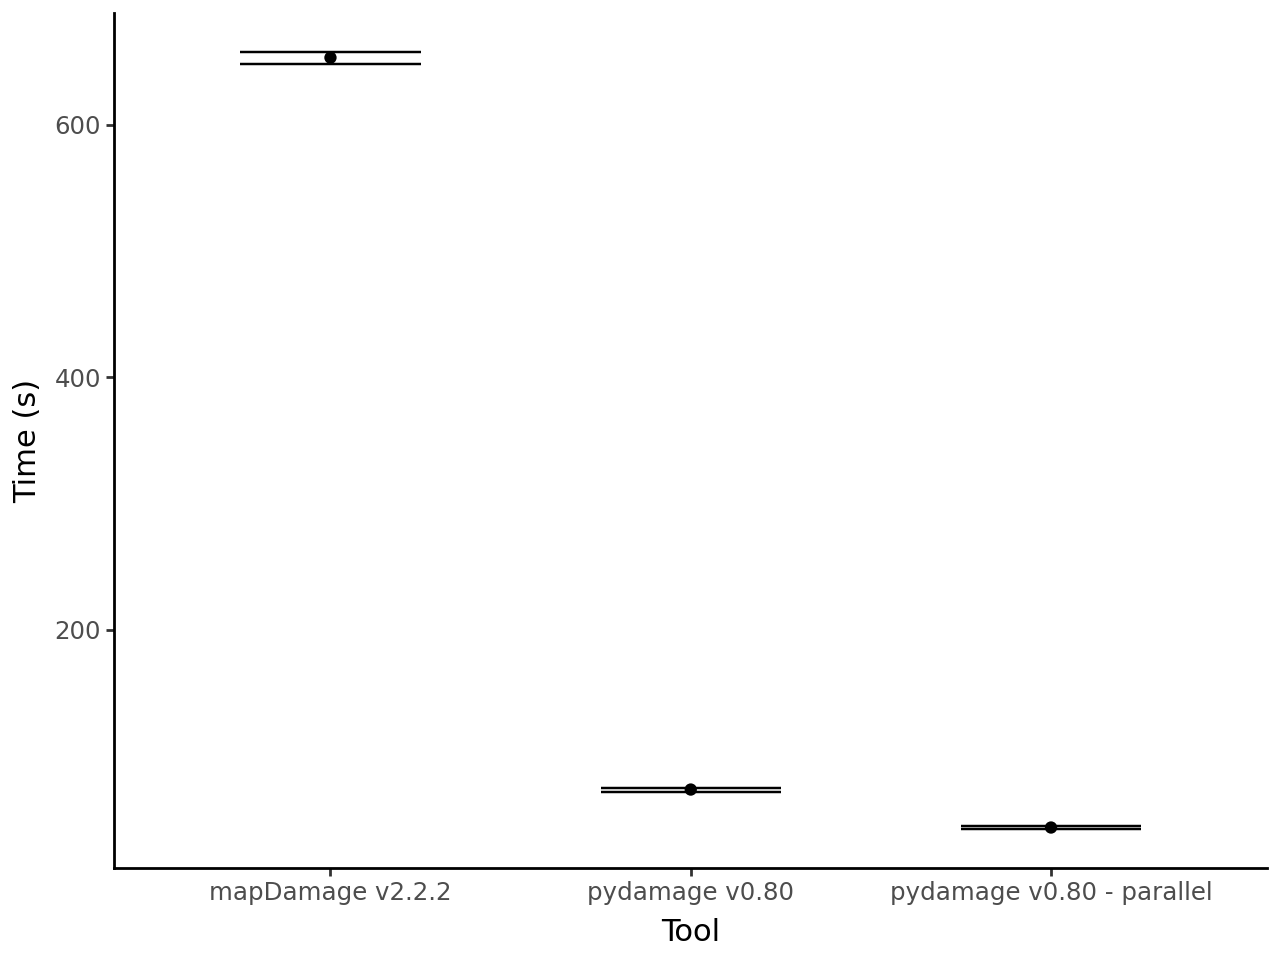

In [11]:
ggplot(runtimes, aes(x = runtimes.index, y = "mean")) + geom_point() + geom_errorbar(aes(ymin = "mean - std", ymax = "mean + std")) + theme_classic() + ylab("Time (s)") + xlab("Tool")

> PyDamage provides a __10-15x__ speedup over mapDamage for the same dataset for damage rescaling.

In [12]:
def get_phred_scores(bam):
    fwd = [] 
    rev = []
    with pysam.AlignmentFile(bam, "rb") as bam:
        for read in bam:
            if not read.is_reverse:
                fwd.append(np.array(read.query_qualities)[:13])
            else:
                rev.append(np.array(read.query_qualities)[::-1][:13])
            # quals.append(np.array(read.query_qualities)[:13])
            # quals.append(np.array(read.get_forward_qualities())[:20])
    return (np.stack(fwd), np.stack(rev))

In [13]:
original_fwd, original_rev = get_phred_scores("../../tests/data/bigger_test_data.bam")

In [14]:
pydamage_fwd, pydamage_rev = get_phred_scores("pydamage_results/pydamage_rescaled.bam") 

In [15]:
mapdamage_fwd, mapdamage_rev = get_phred_scores("results_bigger_test_data/bigger_test_data.rescaled.bam")

In [16]:
columns = ['original', 'mapdamage v2.2.2', 'pydamage v0.80']

In [17]:
df_fwd = (
    pd.DataFrame(
        [original_fwd.mean(axis=0), mapdamage_fwd.mean(axis=0), pydamage_fwd.mean(axis=0)],
    )
    .transpose()
    .set_axis(columns, axis=1)
    .rename_axis("position")
    .reset_index()
    .melt(id_vars = "position", var_name = "bam", value_name = "mean")
).merge(
    (
        pd.DataFrame(
        [original_fwd.std(axis=0), mapdamage_fwd.std(axis=0), pydamage_fwd.std(axis=0)],
    )
    .transpose()
    .set_axis(columns, axis=1)
    .rename_axis("position")
    .reset_index()
    .melt(id_vars = "position", var_name = "bam", value_name = "std")
    ), on=['position', 'bam']
)

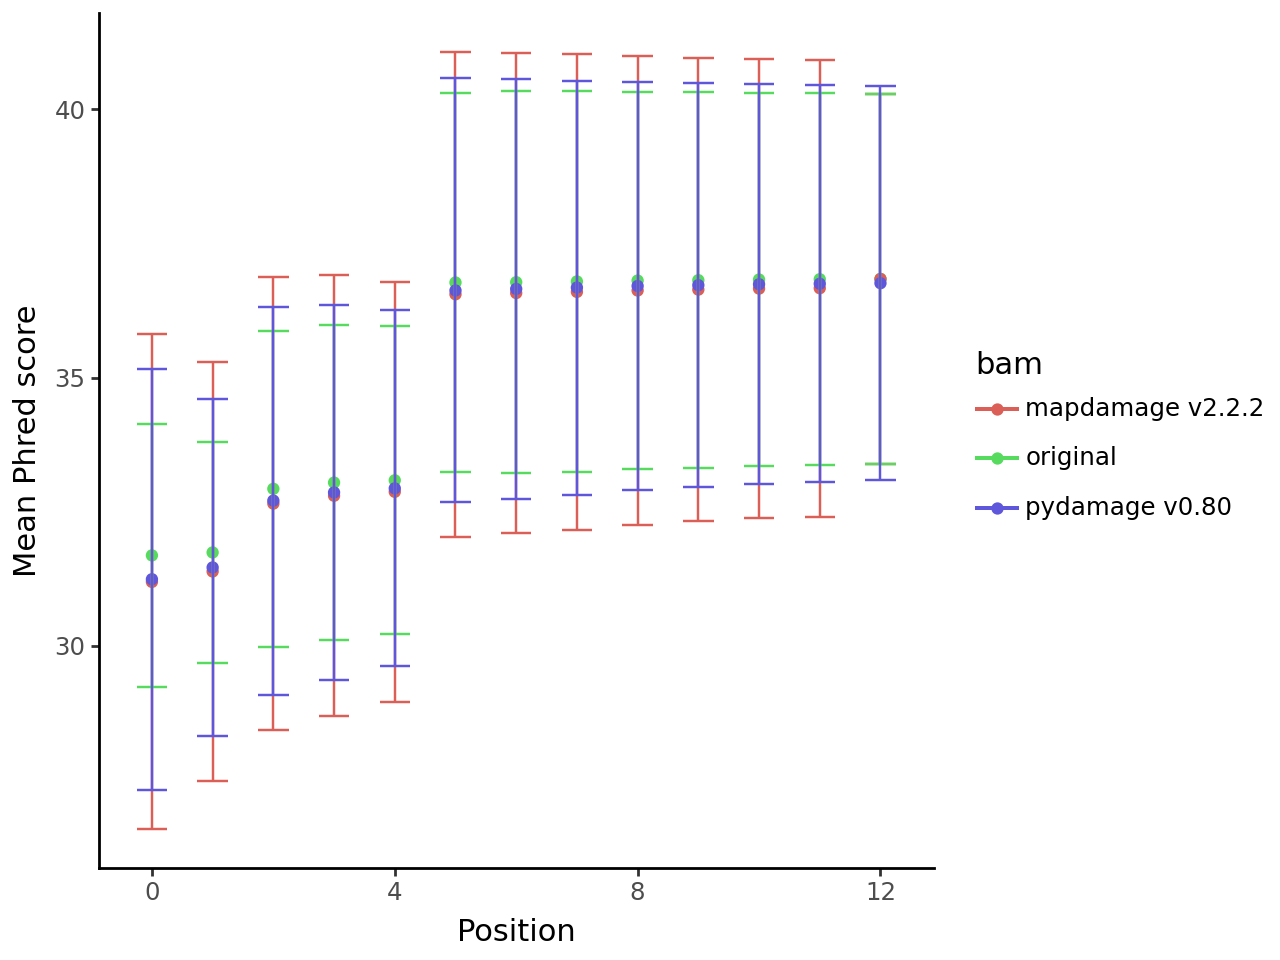

In [18]:
(ggplot(df_fwd, aes(x='position', y='mean', color='bam')) + geom_point() + geom_errorbar(aes(ymin = "mean - std", ymax = "mean + std")) + theme_classic() + ylab("Mean Phred score") + xlab("Position"))

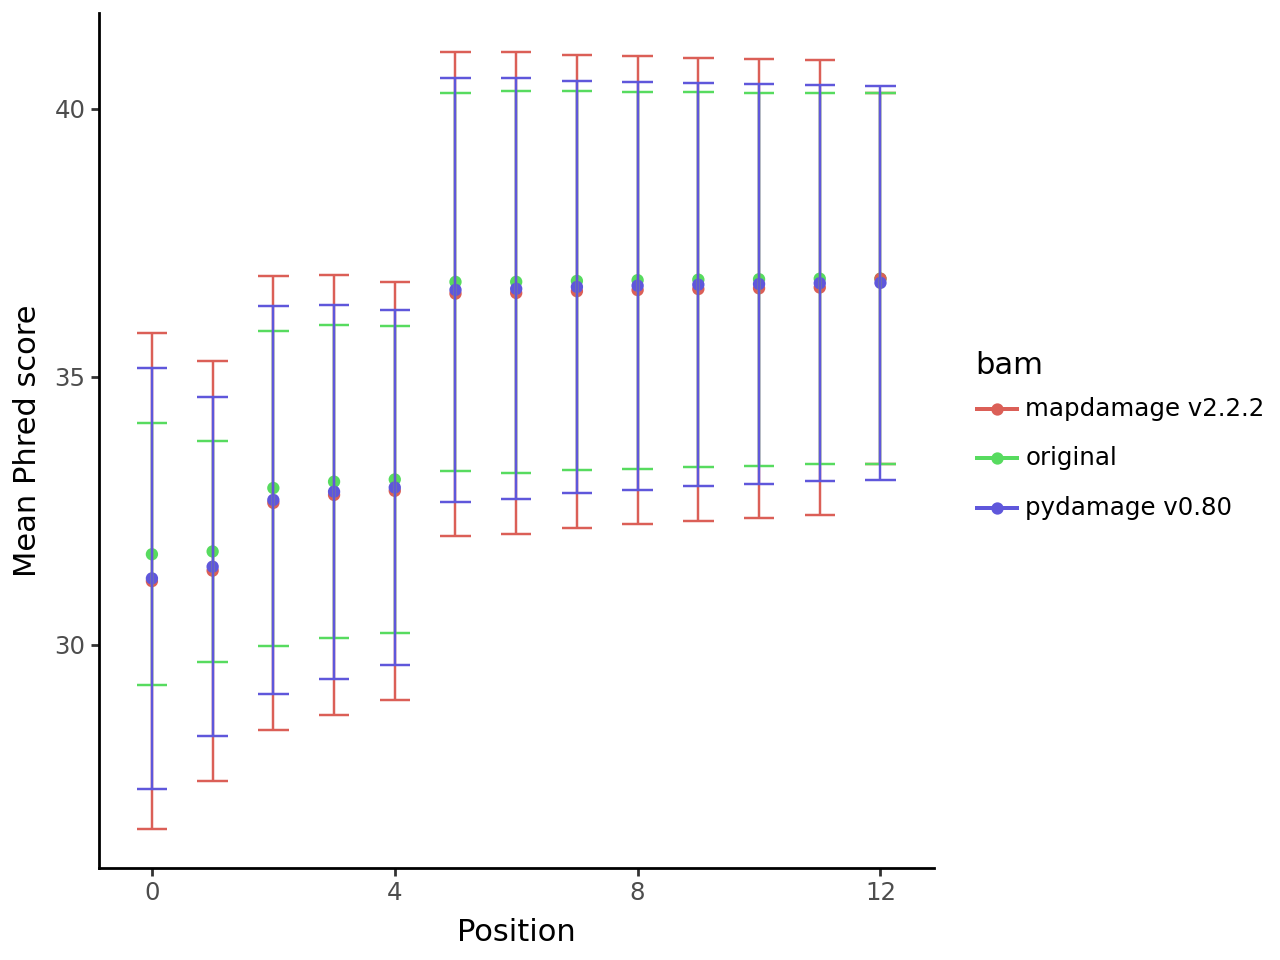

In [19]:
df_rev = (
    pd.DataFrame(
        [original_rev.mean(axis=0), mapdamage_rev.mean(axis=0), pydamage_rev.mean(axis=0)],
    )
    .transpose()
    .set_axis(columns, axis=1)
    .rename_axis("position")
    .reset_index()
    .melt(id_vars = "position", var_name = "bam", value_name = "mean")
).merge(
    (
        pd.DataFrame(
        [original_rev.std(axis=0), mapdamage_rev.std(axis=0), pydamage_rev.std(axis=0)],
    )
    .transpose()
    .set_axis(columns, axis=1)
    .rename_axis("position")
    .reset_index()
    .melt(id_vars = "position", var_name = "bam", value_name = "std")
    ), on=['position', 'bam']
)
(ggplot(df_rev, aes(x='position', y='mean', color='bam')) + geom_point() + geom_errorbar(aes(ymin = "mean - std", ymax = "mean + std")) + theme_classic() + ylab("Mean Phred score") + xlab("Position"))

> mapDamage and PyDamage produce very similar results with regards to reads base quality rescaling